In [1]:
import pandas as pd
import numpy as np


In [2]:
#  į dataframe

brent = pd.read_csv('BrentOilPrices.csv')

In [3]:
brent

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
8355,"Apr 15, 2020",19.80
8356,"Apr 16, 2020",18.69
8357,"Apr 17, 2020",19.75
8358,"Apr 20, 2020",17.36


In [4]:
# .info
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8360 entries, 0 to 8359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8360 non-null   object 
 1   Price   8360 non-null   float64
dtypes: float64(1), object(1)
memory usage: 130.8+ KB


In [5]:
brent.head(1)

,Date,Price
0,20-May-87,18.63


In [6]:
brent.tail(1)

,Date,Price
8359,"Apr 21, 2020",9.12


In [7]:
brent = pd.read_csv('BrentOilPrices.csv', parse_dates=["Date"])

C:\Users\rezav\AppData\Local\Temp\ipykernel_22432\331134767.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent = pd.read_csv('BrentOilPrices.csv', parse_dates=["Date"])


In [8]:
brent.head(5)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


<Axes: xlabel='Date'>

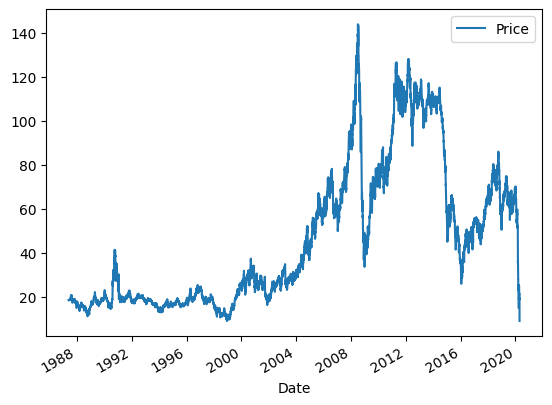

In [10]:
#  integruotas pandas .plot metodas:
brent.plot(x="Date")

In [11]:
ru = pd.read_csv('RU.csv', parse_dates=['Date'])
ru.head()

,Date,Open,High,Low,Close
0,1995-10-23,4.5065,4.5065,4.5065,4.5065
1,1995-10-24,4.5060,4.5060,4.5060,4.5060
2,1995-10-25,4.5060,4.5060,4.5060,4.5060
3,1995-10-26,4.5090,4.5090,4.5090,4.5090
4,1995-10-27,4.5130,4.5130,4.5130,4.5130


<Axes: xlabel='Date'>

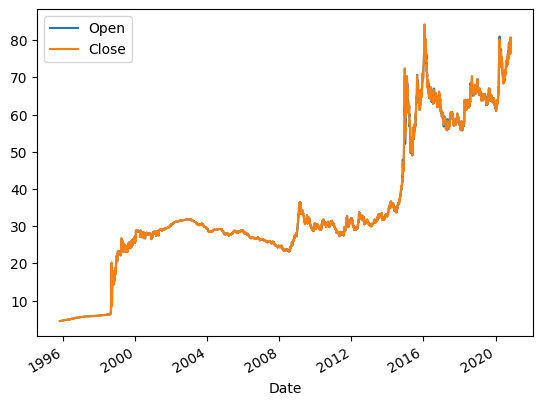

In [16]:
ru.plot(x='Date', y=['Open','Close'])

In [18]:
dus14 = pd.read_csv('Dus2014.csv')
dus14.head(2)

,svoris,stazas,darbo_laiko_dalis,evrk,im_dydzio_kodas,im_dydis,amzius,atostogu_dienos,sutarties_rusis,virsvalandziu_bdu,...,nuosavybe,bdu_val,nuts,vv_darb_sk,virsvalandziu_sk,premijos,bdu_spalio,priemokos,objectid,issilavinimas
0,35.03,0,0.58,XL,0,1_49,20-29,0,A,0,...,B,6.0,LT,6,0,0,6.0,0,1,G4
1,2.39,0,0.54,XN,0,1_49,20-29,0,A,0,...,B,6.0,LT,12,0,0,6.0,0,2,G2


In [25]:
bdu_spalio = dus14['bdu_spalio'].values
print(bdu_spalio)
print(bdu_spalio.mean())
print(np.mean(bdu_spalio))
print(np.median(bdu_spalio))

[   6.    6.    6. ... 3670. 4212. 4218.]
2366.8490910304326
2366.8490910304326
1938.0


In [47]:
#  kelių stulpelių pasirinkimas
d14small = dus14[['lytis', 'amzius', 'bdu_spalio', 'issilavinimas', 'profesija', 'bdu_metinis']]
print(d14small)

      lytis amzius  bdu_spalio issilavinimas  profesija  bdu_metinis
0         M  20-29        6.00            G4        261        22.00
1         F  20-29        6.00            G2        334        22.00
2         F  40-49        6.00            G4        221        22.00
3         F  30-39        6.00            G4        332        32.67
4         M  40-49       11.33            G2        962        32.67
...     ...    ...         ...           ...        ...          ...
44947     F  50-59     3393.00            G4        235     42616.67
44948     F  30-39     3639.67            G4        233     35417.67
44949     F  50-59     3670.00            G4        231     42509.00
44950     F  30-39     4212.00            G4        231     46175.00
44951     F  40-49     4218.00            G4        231     43820.67

[44952 rows x 6 columns]


In [32]:
# duomenų atranka:
f14 = d14small[d14small['lytis'] == 'F']
f14.head(7)

,lytis,amzius,bdu_spalio,issilavinimas,profesija
1,F,20-29,6.00,G2,334
2,F,40-49,6.00,G4,221
3,F,30-39,6.00,G4,332
7,F,20-29,13.33,G2,531
10,F,40-49,10.00,G3,334
12,F,30-39,6.00,G4,241
13,F,20-29,9.00,G3,332


In [34]:
f14vid = f14['bdu_spalio'].mean()
f14mediana = f14['bdu_spalio'].median()
print(f14vid, f14mediana, sep='\n')

2097.379658410087
1751.0


In [37]:
# koks buvo vyrų ir moterų vidutinis atlyginimas 2014 metais?
# rezulataą išspausdinkite vienas šalia kito:
# pvz 
# Vyrų x, moterų y atlyginimai

d14smallMF = dus14[['lytis', 'bdu_spalio']]

F14 = d14smallMF[d14smallMF['lytis'] == 'F']
M14 = d14smallMF[d14smallMF['lytis'] == 'M']

F14vid = F14['bdu_spalio'].mean()
M14vid = M14['bdu_spalio'].mean()
print('Moterų vidutinis atlyginimas: ', F14vid, 'Vyrų vidutinis atlyginimas', M14vid, sep='\n')

Moterų vidutinis atlyginimas: 
2097.379658410087
Vyrų vidutinis atlyginimas
2633.693743912158


In [38]:
# and operatoriai:
# atrinkti tik vyrus, kurių išsilavinimas pažymėtas G3

M14G3 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G3')]
M14G3.head(5)

,lytis,amzius,bdu_spalio,issilavinimas,profesija
11,M,20-29,9.67,G3,315
18,M,60+,6.00,G3,312
19,M,20-29,6.00,G3,333
21,M,20-29,28.67,G3,241
25,M,50-59,6.00,G3,261


In [39]:
# or operatoriai:
# atrinkti tik vyrus, kurių išsilavinimas pažymėtas G3

M14G3 = d14small[(d14small['lytis'] == 'M') | (d14small['issilavinimas'] == 'G3')]
M14G3.head(5)

,lytis,amzius,bdu_spalio,issilavinimas,profesija
0,M,20-29,6.00,G4,261
4,M,40-49,11.33,G2,962
5,M,30-39,6.00,G2,122
6,M,60+,6.00,G4,221
8,M,20-29,6.67,G1,912


In [50]:
#  atrinkti tik vyrus pagal išsulavinimą G1, G2, G3, G4 ir surasti jų vidutinius atlyginimus
# spausdinti taip:
# G1 x
# G2 y

M14G1 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G1')]
M14G1BduVid = M14G1['bdu_spalio'].mean()
print('G1 spalį gauna:', M14G1BduVid)

M14G2 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G2')]
M14G2BduVid = M14G2['bdu_spalio'].mean()
print('G2 spalį gauna:', M14G2BduVid)

M14G3 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G3')]
M14G3BduVid = M14G3['bdu_spalio'].mean()
print('G3 spalį gauna:', M14G3BduVid)

M14G4 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G4')]
M14G4BduVid = M14G4['bdu_spalio'].mean()
print('G4 spalį gauna:', M14G4BduVid)



G1 spalį gauna: 1762.3009536541888
G2 spalį gauna: 2129.485699084385
G3 spalį gauna: 2900.4601477312694
G4 spalį gauna: 4158.559151846785


In [49]:
M14G1 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G1')]
M14G1BduVid = M14G1['bdu_metinis'].mean()
print('G1 2014 m. gauna:', M14G1BduVid)

M14G2 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G2')]
M14G2BduVid = M14G2['bdu_metinis'].mean()
print('G2 2014 m. gauna:', M14G2BduVid)

M14G3 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G3')]
M14G3BduVid = M14G3['bdu_metinis'].mean()
print('G3 2014 m. gauna:', M14G3BduVid)

M14G4 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G4')]
M14G4BduVid = M14G4['bdu_metinis'].mean()
print('G4 2014 m. gauna:', M14G4BduVid)

G1 2014 m. gauna: 16627.79112299465
G2 2014 m. gauna: 22117.661825455747
G3 2014 m. gauna: 32803.473422441086
G4 2014 m. gauna: 50093.747556771545


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dus14 = pd.read_csv('DUS2014.csv')
dus18 = pd.read_csv('DUS2018.csv')

In [7]:
d14s = dus14[['lytis', 'amzius', 'issilavinimas', 'bdu_spalio', 'profesija']]

In [8]:
d14s

,lytis,amzius,issilavinimas,bdu_spalio,profesija
0,M,20-29,G4,6.00,261
1,F,20-29,G2,6.00,334
2,F,40-49,G4,6.00,221
3,F,30-39,G4,6.00,332
4,M,40-49,G2,11.33,962
...,...,...,...,...,...
44947,F,50-59,G4,3393.00,235
44948,F,30-39,G4,3639.67,233
44949,F,50-59,G4,3670.00,231
44950,F,30-39,G4,4212.00,231


In [9]:
# prideti nauja stulpeli
bdu_spalio = d14s['bdu_spalio'].values
bdu_eurais = bdu_spalio/3.4528
d14s['bdu€'] = bdu_eurais
d14s.head(10)

# d14s['bdu€'] = d14s['bdu_spalio']/3.4528 #

C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\4264616852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d14s['bdu€'] = bdu_eurais


,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
0,M,20-29,G4,6.00,261,1.737720
1,F,20-29,G2,6.00,334,1.737720
2,F,40-49,G4,6.00,221,1.737720
3,F,30-39,G4,6.00,332,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
7,F,20-29,G2,13.33,531,3.860635
8,M,20-29,G1,6.67,912,1.931766
9,M,40-49,G2,6.00,332,1.737720


In [10]:
#  .query()
d14s.query('lytis == "M"')

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
0,M,20-29,G4,6.00,261,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
8,M,20-29,G1,6.67,912,1.931766
...,...,...,...,...,...,...
44925,M,40-49,G4,7849.67,134,2273.421571
44927,M,30-39,G4,1793.00,231,519.288693
44931,M,50-59,G4,3246.00,232,940.106580
44934,M,60+,G4,3819.67,231,1106.252896


In [11]:
d14s.query('lytis == "M" and issilavinimas == "G3"')

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
11,M,20-29,G3,9.67,315,2.800626
18,M,60+,G3,6.00,312,1.737720
19,M,20-29,G3,6.00,333,1.737720
21,M,20-29,G3,28.67,241,8.303406
25,M,50-59,G3,6.00,261,1.737720
...,...,...,...,...,...,...
44805,M,40-49,G3,3685.00,233,1067.249768
44808,M,60+,G3,2692.00,235,779.657090
44843,M,20-29,G3,1625.00,235,470.632530
44914,M,40-49,G3,3444.33,234,997.546918


In [12]:
edu = input("Įveskite išsilavinimo kodą (G1, G2, G3, G4)")
ats = d14s.query('issilavinimas == @edu') # @ !!!!!!!! ie6ko kode iki sios eilutes
ats.head(3)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€


In [13]:
# parašykite for ciklą, kuris išspausdintų išsilavinimo kodą ir vidutinį atlyginimą
# respondentų su tuo išsilavinimo kodu.
# naudokite .query() metodą
edus = ['G1', 'G2', 'G3', 'G4']
for i in edus:
    g = d14s.query('issilavinimas == @i')['bdu€'].mean()
print(i, g)

G4 1011.9653972982893


In [14]:
def ltlToEuro(litas):
    euras = litas/3.45280
    return euras

d14s['Eurai iš funkcijos'] = d14s['bdu_spalio'].apply(ltlToEuro)
d14s.head(6)


C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\4238558751.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d14s['Eurai iš funkcijos'] = d14s['bdu_spalio'].apply(ltlToEuro)


,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€,Eurai iš funkcijos
0,M,20-29,G4,6.00,261,1.737720,1.737720
1,F,20-29,G2,6.00,334,1.737720,1.737720
2,F,40-49,G4,6.00,221,1.737720,1.737720
3,F,30-39,G4,6.00,332,1.737720,1.737720
4,M,40-49,G2,11.33,962,3.281395,3.281395
5,M,30-39,G2,6.00,122,1.737720,1.737720


In [15]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_DATE', 'OCCUR_TIME'])
nypd.head(2)

C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\3580730019.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_DATE', 'OCCUR_TIME'])


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,201575314,2019-08-23,2024-04-11 22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,205748546,2019-11-27,2024-04-11 15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571


In [16]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
nypd.head(3)
# .dt modulis, veikia tik tada, jei
#  stulpelis DataFrame yra datetime tipo
nypd_small = nypd[['DATA', 'BORO', 'STATISTICAL_MURDER_FLAG']]
nypd_small.head()
nypd_small['MonthNr'] = nypd_small['DATA'].dt.month
nypd_small['Hour'] = nypd_small['DATA'].dt.hour
nypd_small['HR'] = nypd_small['DATA'].dt.round('H').dt.hour
nypd_small['MthName'] = nypd_small['DATA'].dt.month_name()
nypd_small.head(3)

C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\3294748692.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\3294748692.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nypd_small['MonthNr'] = nypd_small['DATA'].dt.month
C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\3294748692.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthName
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February


In [17]:
# sukurkite du naujus stulpelius
# viename turi būti paros laikas ('Rytas, Vakaras, etc)
# kitame metų laikas (žiema, vasara, etc)
# naudokite stulpelius Hour ir MonthNr
def para(x):
    if x >= 22 or x < 6:
        return 'Naktis'
    elif x >= 6 and x < 10:
        return 'Rytas'
    elif x >= 10 and x < 16:
        return 'Diena'
    else:
        return 'Vakaras'

def metai(x):
    if x in [12,1,2]:
        return 'Žiema'
    elif x in [3,4,5]:
        return 'Pavasaris'
    elif x in [6,7,8]:
        return 'Vasara'
    else:
        return 'Ruduo'

nypd_small['ParosL'] = nypd_small['Hour'].apply(para)
nypd_small['MetųL'] = nypd_small['MonthNr'].apply(metai)
nypd_small.head()

C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\1206668426.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nypd_small['ParosL'] = nypd_small['Hour'].apply(para)
C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\1206668426.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nypd_small['MetųL'] = nypd_small['MonthNr'].apply(metai)


,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthName,ParosL,MetųL
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August,Naktis,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November,Diena,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February,Vakaras,Žiema
3,2019-10-24 00:52:00,STATEN ISLAND,True,10,0,1,October,Naktis,Ruduo
4,2019-08-22 18:03:00,BRONX,False,8,18,18,August,Vakaras,Vasara


In [18]:
nypd_small['MthName'].value_counts() # kiek kartu pasikartojo konkrecios vertes: pirmas stulpelis index, antras values

MthName
July         2482
August       2462
June         2192
May          2037
September    2033
October      1851
December     1601
April        1578
November     1550
January      1411
March        1331
February     1098
Name: count, dtype: int64

In [19]:
nypd_small['MthName'].value_counts().sort_values(ascending=True)

MthName
February     1098
March        1331
January      1411
November     1550
April        1578
December     1601
October      1851
September    2033
May          2037
June         2192
August       2462
July         2482
Name: count, dtype: int64

In [22]:
nypd_small['MthName'].value_counts().sort_index(ascending=True)

MthName
April        1578
August       2462
December     1601
February     1098
January      1411
July         2482
June         2192
March        1331
May          2037
November     1550
October      1851
September    2033
Name: count, dtype: int64

In [23]:
shootings = nypd_small['MthName'].value_counts()
months = shootings.index
counts = shootings.values
print(months, counts, sep='\n')

Index(['July', 'August', 'June', 'May', 'September', 'October', 'December',
       'April', 'November', 'January', 'March', 'February'],
      dtype='object', name='MthName')
[2482 2462 2192 2037 2033 1851 1601 1578 1550 1411 1331 1098]


In [24]:
nypd_small['MonthNr'].value_counts().sort_index(ascending=True)

MonthNr
1     1411
2     1098
3     1331
4     1578
5     2037
6     2192
7     2482
8     2462
9     2033
10    1851
11    1550
12    1601
Name: count, dtype: int64

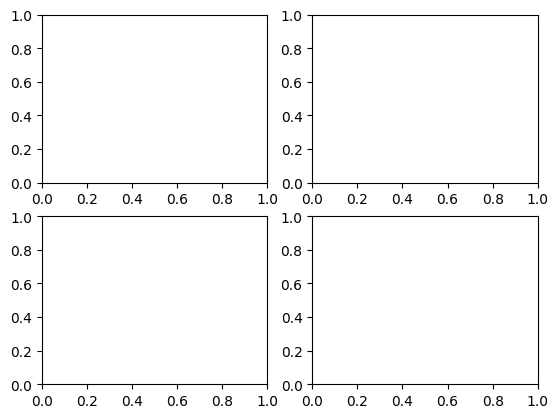

In [27]:
#  plt.subplots():
langas, grafikas = plt.subplots(2,2)

plt.show()

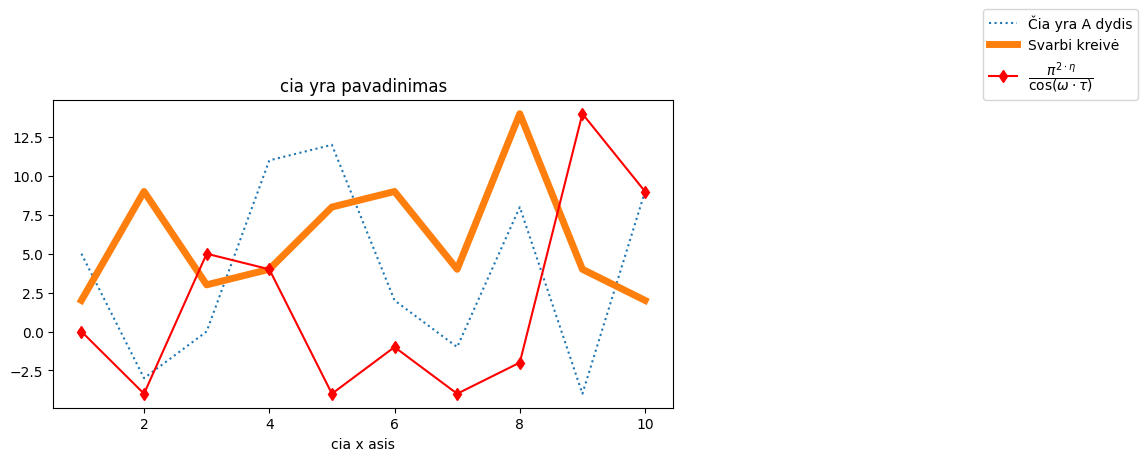

In [44]:
a = np.arange(1,11)
b = np.random.randint(-5, 15, 10)
c = np.random.randint (-5, 15, 10)
d = np.random.randint (-5, 15, 10)
langas, grafikas = plt.subplots(figsize=[8,4])
# .plot() metodas
grafikas.plot(a,b, label="Čia yra A dydis", linestyle = ':')
grafikas.plot(a,c, label="Svarbi kreivė", linewidth = 5)
grafikas.plot(a,d, label=r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$', marker = 'd', color = "red")

grafikas.set_xlabel("cia x asis")
grafikas.set_title('cia yra pavadinimas')

# grafikas.legend(loc='best')
grafikas.legend(loc=[1.5,1])

plt.show()
# 'best', 'upper right', 'upper left', 'lower left',
# 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center

In [ ]:
a = np.arange(1,11)
b = np.random.randint(-5, 15, 10)
c = np.random.randint (-5, 15, 10)
d = np.random.randint (-5, 15, 10)
langas, grafikas = plt.subplots(figsize=[8,4])
# .plot() metodas
grafikas.plot(a,b, label="Čia yra A dydis")
grafikas.plot(a,c, label="Svarbi kreivė")
grafikas.plot(a,d, label=r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$')

grafikas.legend(loc='best')

plt.show()

In [47]:
# nypd susisaudymu duomenys.
# nubraizyti vizualizacija, naudojant ka tik pateikta pvz, kad matytusi , kuri menesi yra daugiausiai, maziausiai,
# fiksuotu susisaudymu.
# sudeti prasmingus asiu pavadinimus

nypd_small['MonthNr'].value_counts().sort_index(ascending=True)
month = nypd_small['MonthNr']
shootings = nypd_small['MonthNr'].value_counts()

grafikas.plot(month, shootings, label="Susisaudymu pasiskirstymas pagal menesius", linewidth = 2, marker = 'o', color = "red")
grafikas.set_xlabel("Menuo")
grafikas.set_title('Susisaudymu skaicius')

grafikas.legend(loc=[1,1])

plt.show()

ValueError: x and y must have same first dimension, but have shapes (21626,) and (12,)

In [48]:
months = nypd_small['MonthNr'].value_counts().sort_index(ascending=True).index
shootings = nypd_small['MonthNr'].value_counts().sort_index(ascending=True).values
grafikas.plot(month, shootings, label="Susisaudymu pasiskirstymas pagal menesius", linewidth = 2, marker = 'o', color = "red")
grafikas.set_xlabel("Menuo")
grafikas.set_title('Susisaudymu skaicius')

grafikas.legend(loc=[1,1])

plt.show()

ValueError: x and y must have same first dimension, but have shapes (21626,) and (12,)

In [58]:
nypd_small.head(5)

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthName,ParosL,MetųL
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August,Naktis,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November,Diena,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February,Vakaras,Žiema
3,2019-10-24 00:52:00,STATEN ISLAND,True,10,0,1,October,Naktis,Ruduo
4,2019-08-22 18:03:00,BRONX,False,8,18,18,August,Vakaras,Vasara


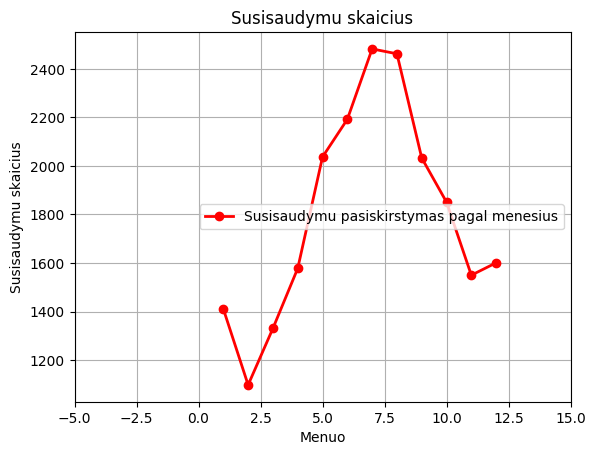

In [62]:
months = nypd_small['MonthNr'].value_counts().sort_index(ascending=True).index
shootings = nypd_small['MonthNr'].value_counts().sort_index(ascending=True).values

langas, grafikas = plt.subplots()

grafikas.plot(months, shootings, label="Susisaudymu pasiskirstymas pagal menesius", linewidth = 2, marker = 'o', color = "red")

# grafikas.set_xticks(months) # parodo visus asies rodiklius
grafikas.set_xlim(-5, 15) # nurodo asies pradzia ir pabaiga
grafikas.grid()

grafikas.set_xlabel("Menuo")
grafikas.set_ylabel("Susisaudymu skaicius")
grafikas.set_title('Susisaudymu skaicius')

grafikas.legend()

plt.show()

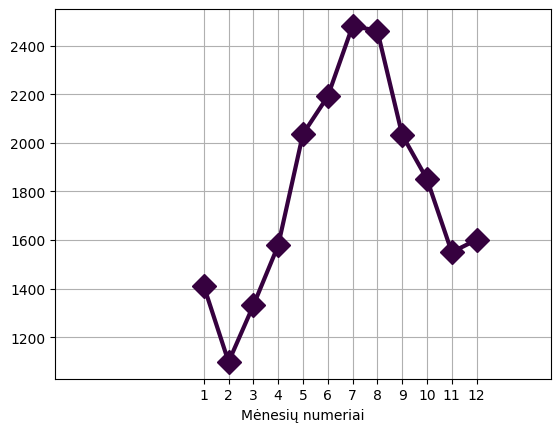

In [63]:
monts_counts = nypd_small['MonthNr'].value_counts().sort_index(ascending=True)
months = monts_counts.index
counts = monts_counts.values

fig, ax = plt.subplots()
ax.plot(months, counts, lw=3, c='xkcd:deep purple', marker='D', ms=12)

ax.set_xticks(months) #x ašies norimų skaičių palikimas
ax.set_xlim(-5, 15) #x ašies ribų keitimas
ax.grid() #tinklelio uždėjimas
ax.set_xlabel('Mėnesių numeriai')

plt.show()

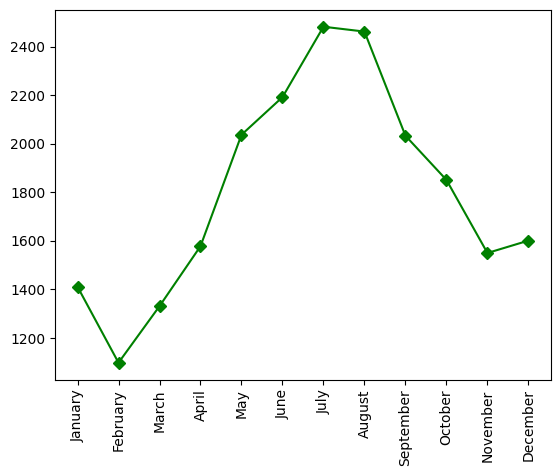

In [70]:
months = nypd_small[['MthName', 'MonthNr']].value_counts().reset_index().sort_values(by='MonthNr')
fig, ax = plt.subplots()

mnames = months['MthName'].values
mnumbers = months['MonthNr']
counts = months['count'].values

ax.plot(mnumbers, counts, marker='D', c='green')
ax.set_xticks(mnumbers)
ax.set_xticklabels(mnames, rotation=90)

plt.show()

In [69]:
nypd_small[['MthName', 'MonthNr']].value_counts().reset_index()

,MthName,MonthNr,count
0,July,7,2482
1,August,8,2462
2,June,6,2192
3,May,5,2037
4,September,9,2033
5,October,10,1851
6,December,12,1601
7,April,4,1578
8,November,11,1550
9,January,1,1411


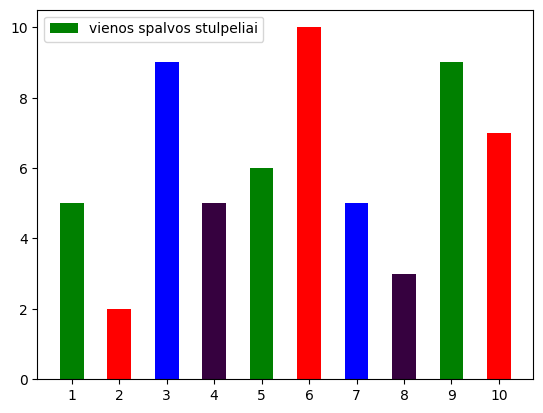

In [83]:
# bar grafikai
a = np.arange(1,11)
b = np.random.randint(1,11, 10)
color_list = ['green', 'red', 'blue', 'xkcd:deep purple']

fig, ax = plt.subplots()
ax.bar(a,b, color = color_list, width = 0.5, label = 'vienos spalvos stulpeliai')
ax.legend(loc='best')
ax.set_xticks(a)

plt.show()

In [2]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
# import mysql.connector as cnt
#import panel as pn
#pn.extension()
# import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\rezav\OneDrive\Stalinis kompiuteris\Duomenų mokslas\JupyterNotebooksR


In [ ]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(fwidth*2,fheight*2), gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,1]})
#ax1:
#plotting code:


#ax1.legend(loc='best')
#ax2:
#plotting code:


#ax2.legend(loc='best')
#ax3:
#plotting code:


#ax3.legend(loc='best')
#ax4:
#plotting code:


#ax4.legend(loc='best')
fig.tight_layout()
plt.show()

In [ ]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


axis.set_xlabel('X ašis', fontsize=fontsize)
axis.set_ylabel('Y ašis', fontsize=fontsize)
axis.set_title('Pavadinimas', fontsize=titlesize)
axis.tick_params(axis='x', labelsize=labelsize)
axis.tick_params(axis='y', labelsize=labelsize)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
# :imp -importavimui
# :sfig - vienam grafikui
# :fig - 1nm grafikui su daugiau kodo

In [26]:
#Nuskaitykite DUS2014csv ir DUS2018.csv į pandas lenteles

DUS2014 = pd.read_csv('DUS2014.csv')
DUS2014.head(5)

DUS2018 = pd.read_csv('DUS2018.csv')
DUS2014.head(5)

# .query(), .value_counts():
# Kiek dalyvavo vyrų, moterų apklausoje kiekvienais metais. Suraskite pokytį,
# rezultatus išspausdinkite

dus2014M = DUS2014.query('lytis == "M"')
VyruSk14 = dus2014M['lytis'].value_counts().values[0] #

dus2018M = DUS2018.query('lytis == "M"')
VyruSk18 = dus2018M['lytis'].value_counts().values[0]

VyruSkPokytis = VyruSk18 - VyruSk14
print('Vyru skaiciaus pokytis', VyruSkPokytis)


dus2014F = DUS2014.query('lytis == "F"')
MoteruSk14 = dus2014F['lytis'].value_counts().values[0] #

dus2018F = DUS2018.query('lytis == "F"')
MoteruSk18 = dus2018F['lytis'].value_counts().values[0]

MoteruSkPokytis = MoteruSk18 - MoteruSk14
print('Moteru skaiciaus pokytis', MoteruSkPokytis)



Vyru skaiciaus pokytis -110
Moteru skaiciaus pokytis -1678


In [ ]:
# Kiek dalyvavo vyrų, moterų apklausoje kiekvienais metais. Suraskite pokytį,
# rezultatus išspausdinkite
moterys_2014 = d14s[d14s["lytis"]=="F"] 
vyrai_2014 = d14s[d14s["lytis"]=="M"] 
moteru_sk_2014 = moterys_2014['lytis'].value_counts().values[0] # 
vyru_sk_2014 = vyrai_2014['lytis'].value_counts().values[0]
moterys_2018 = d18s[d18s["lytis"]=="F"] 
vyrai_2018 = d18s[d18s["lytis"]=="M"]
moteru_sk_2018 = moterys_2018['lytis'].value_counts().values[0]
vyru_sk_2018 = vyrai_2018['lytis'].value_counts().values[0]
moteru_sk_pokytis = moteru_sk_2018-moteru_sk_2014
vyru_sk_pokytis = vyru_sk_2018-vyru_sk_2014

In [46]:
# kiek 2018 metais buvo respondentų iš kiekvienos amžiaus grupės?
Gr14_29 = DUS2018.query('amzius == "14-29"')
Gr30_30 = DUS2018.query('amzius == "30-39"')
Gr40_49 = DUS2018.query('amzius == "40-49"')
Gr50_59 = DUS2018.query('amzius == "50-59"')
GrVirs60 = DUS2018.query('amzius == "60+"')

DUS2018['amzius'].value_counts().sort_index(ascending=True)

amziaus_grupes = DUS2018['amzius'].value_counts().index # cia tampa indekso sarasu
print(amziaus_grupes)
    
# kiek 2018 metais buvo respondentų iš kiekvienos amžiaus grupės?
for grupe in amziaus_grupes:
    amziaus_grupes_lentele = DUS2018.query('amzius == @grupe')
    vidutinis_atlyginimas = amziaus_grupes_lentele['bdu_spalio'].mean()
    print('Amžiaus grupė: ', grupe, ' vidutinis atlyginimas: ',vidutinis_atlyginimas)
    


# Suraskite vidutinius atlyginimus kiekvienai amžiaus grupei (2018 metams)
# hint:as for ciklas moka eiti per array vertes, kurias gausite su .index arba .values atributais

Index(['50-59', '40-49', '14-29', '30-39', '60+'], dtype='object', name='amzius')
Amžiaus grupė:  50-59  vidutinis atlyginimas:  856.0671241050119
Amžiaus grupė:  40-49  vidutinis atlyginimas:  980.8554293599406
Amžiaus grupė:  14-29  vidutinis atlyginimas:  865.5633005977796
Amžiaus grupė:  30-39  vidutinis atlyginimas:  1088.9557207498383
Amžiaus grupė:  60+  vidutinis atlyginimas:  784.542386341076


In [52]:
DUS2018['issilavinimas'].value_counts()

IssilavinimoGrSarasas = DUS2018['issilavinimas'].value_counts().sort_index(ascending=True).index
    
for grupe in IssilavinimoGrSarasas:
    Issilavinimo_grupes_lentele = DUS2018.query('issilavinimas == @grupe')
    vidutinis_atlyginimas = Issilavinimo_grupes_lentele['bdu_spalio'].mean()
    print('Issilavinimo grupė: ', grupe, ' vidutinis atlyginimas: ',vidutinis_atlyginimas)

Issilavinimo grupė:  G1  vidutinis atlyginimas:  626.3916786226686
Issilavinimo grupė:  G2  vidutinis atlyginimas:  732.6871572212066


Issilavinimo grupė:  G3  vidutinis atlyginimas:  1094.7640256572408
Issilavinimo grupė:  G4  vidutinis atlyginimas:  1246.4511960095226


In [34]:
DUS2018['amzius'].value_counts()

amzius
50-59    10056
40-49     9421
14-29     9368
30-39     9282
60+       5037
Name: count, dtype: int64

In [32]:
DUS2018 = pd.read_csv('DUS2018.csv')
DUS2018.head(5)

,svoris,stazas,darbo_laiko_dalis,evrk,im_dydzio_kodas,im_dydis,amzius,atostogu_dienos,sutarties_rusis,virsvalandziu_bdu,...,sutartis,apmoketos_val,bdu_val,nuts,virsvalandziu_sk,premijos,bdu_spalio,priemokos,objectid,issilavinimas
0,25.57,0,100,XC,0,1_49,40-49,20,A,0,...,N,183,2.51,LT,0,146,460,0,1,G2
1,25.05,13,100,XC,0,1_49,50-59,26,A,0,...,N,183,8.13,LT,0,132,1487,0,2,G2
2,25.44,13,100,XC,0,1_49,40-49,26,A,0,...,N,183,8.20,LT,0,132,1500,0,3,G2
3,24.91,13,100,XC,0,1_49,50-59,26,A,0,...,N,183,8.20,LT,0,132,1500,0,4,G2
4,24.51,18,100,XM,1,50_249,40-49,24,A,0,...,N,183,2.19,LT,0,0,400,0,5,G2


Moteru BDU vidurkis 832.1469450889405
Vyru BDU vidurkis 1014.4962626801922


In [75]:
DUS2018 = pd.read_csv('DUS2018.csv')

BduF = DUS2018.query('lytis == "F"')['bdu_spalio'].mean()
BduM = DUS2018.query('lytis == "M"')['bdu_spalio'].mean()
BduBendras = DUS2018['bdu_spalio'].mean()

# Kiek procentais vyrai uždirba daugiau, nei bendras atlyginimų vidurkis?
BduMProcBendras = 100 * ((BduM - BduBendras) / BduBendras)
print('Vyrai uzdirba ',BduMProcBendras, '% daugiau nei vidurkis')



Vyrai uzdirba  9.427035640478195 % daugiau nei vidurkis


In [77]:
# Kiek procentais moterys uždirba mažiau, nei bendras atlyginimų vidurkis?
BduFProcBendras = 100 * ((BduF - BduBendras) / BduBendras)
print('Moterys uzdirba ',BduFProcBendras, '% daugiau nei vidurkis')


Vyrai uzdirba  -10.24178524049633 % daugiau nei vidurkis


In [2]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
# import mysql.connector as cnt
#import panel as pn
#pn.extension()
# import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\rezav\OneDrive\Stalinis kompiuteris\Duomenų mokslas\JupyterNotebooksR


In [3]:
# Nuskaitykite aruodas.csv failą ir suformuojamas data frame.
DfAruodas = pd.read_csv('aruodas.csv')
DfAruodas.head(5)

,Unnamed: 0,Linkas,Adresas,Kaina,€/S,Aukštas,Plotas,Kambariai
0,0,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",155 000 €,3690€/m²,4/4,42.00,2
1,1,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Pavilnionių g.",125 880 €,2977€/m²,4/4,42.28,2
2,2,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",166 000 €,3773€/m²,2/4,44.00,2
3,3,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Perkūnkiemio g.",109 900 €,3283€/m²,7/12,33.48,1
4,4,https://www.aruodas.lt/butai-vilniuje-pilaitej...,"Pilaitė, Pilkalnio g.",137 000 €,3703€/m²,4/4,37.00,2


In [4]:
f = '3690€/m²'
def vert(el):
    elF = float(el[:-4])
    return elF

ats = vert(f)
print(ats)

3690.0


In [39]:
# Pridėkite prie DataFrame'o naują stulpelį "KainaS", kur būtų skaičiai (float'ai) iš stulpelio "€/S"
# tam panaudokite savo sukurtą funkciją, kuri tekstą verstų į float'us
# bei .apply() metodą
f = '3690€/m²' # formule keicianti is str i float
def vertimas(el):
    elF = float(el[:-4])
    return elF

ats = vertimas(f)
print(ats)

DfAruodas['KainaS'] = DfAruodas['€/S'].apply(vertimas) # pritaikymas anksciau parasytos formules
DfAruodas.head(5)



3690.0


,Unnamed: 0,Linkas,Adresas,Kaina,€/S,Aukštas,Plotas,Kambariai,KainaS
0,0,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",155 000 €,3690€/m²,4/4,42.00,2,3690.0
1,1,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Pavilnionių g.",125 880 €,2977€/m²,4/4,42.28,2,2977.0
2,2,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",166 000 €,3773€/m²,2/4,44.00,2,3773.0
3,3,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Perkūnkiemio g.",109 900 €,3283€/m²,7/12,33.48,1,3283.0
4,4,https://www.aruodas.lt/butai-vilniuje-pilaitej...,"Pilaitė, Pilkalnio g.",137 000 €,3703€/m²,4/4,37.00,2,3703.0


In [9]:
#  Suraskite vidutinę kv. m. kainą.

VidKaina = DfAruodas['KainaS'].mean()
print(VidKaina)

NVidKaina = np.mean(DfAruodas['KainaS'])
print(NVidKaina)

3301.46678555506
3301.46678555506


In [20]:
#Dar su aruodas.csv:
# Suraskite, kiek buvo pigių, kiek buvo brangių butų (mažiau už vidutinę
# kainą, daugiau nei vidutinė kaina)
#Suraskite vidutinį butų plotą.
PigusButai = (DfAruodas['KainaS'] < VidKaina).sum()
print('Pigiu butu yra:', PigusButai)
BrangusButai = (DfAruodas['KainaS'] > VidKaina).sum()
print('Brangiu butu yra:', BrangusButai)

VidPlotas = DfAruodas['Plotas'].mean()
print('Vidutinis buto plotas yra ' , VidPlotas, 'kv. m')


# BduF = DUS2018.query('lytis == "F"')['bdu_spalio'].mean()
# PB = DfAruodas.query('KainaS < {VidKaina}')

Pigiu butu yra: 1283
Brangiu butu yra: 960
Vidutinis buto plotas yra  60.41541685242979 kv. m


In [29]:
PB = len(DfAruodas.query('KainaS < @VidKaina'))
print(PB)

BB = len(DfAruodas.query('KainaS > @VidKaina'))
print(BB)

1283
960


In [ ]:
#Su life-exp.csv:
#Nuskaitykite failą
#Suraskite vidutinę, minimalią, maksimalią gyvenimo trukmę Lietuvai, 
# Latvijai, Švedijai, Vokietijai
# Padarykite, jog vartotojas galėtų įvesti, kokios šalies
# duomenis reikia išvesti
#Bonus - .plot() vizualizacija tokių duomenų:
# gyvenimo trukmė kiekvienais metais Lietuvai ir vartotojo įvestai šaliai

#Su life-exp.csv:
#atrinkite su .query() į naują lentelę tik 2019 metų duomenis.
# Toliau naudojama tik naujoji lentelė
# Suraskite vidutinę gyvenimo trukmę
# Suskirstykite valstybes į ilgaamžes ir ne
# jei gyvenimo trukmė mažiau nei vidurkis - neilgaamžė
# jei didesnė - ilgaamžė.
# Kiek buvo valstybių ilgaamžių, neilgaamžių?

#Su Dar su life-exp.csv:
#Nuskaitykite failą
#Suraskite vidutinę, minimalią, maksimalią gyvenimo trukmę Lietuvai, 
# Latvijai, Švedijai, Vokietijai
# Padarykite, jog vartotojas galėtų įvesti, kokios šalies
# duomenis reikia išvesti
#Bonus - .plot() vizualizacija tokių duomenų:
# gyvenimo trukmė kiekvienais metais Lietuvai ir vartotojo įvestai šaliai

In [96]:
#AUTO.CSV failas:

DfAutoplius = pd.read_csv('auto.csv', sep='|')

#Raskite vidutinę kainą, ridą visiems automobiliams bei atskirai šiems: BMW, Audi, Toyota, Vokswagen, Ford.

DfAutoTrump = DfAutoplius[['gamintojas','rida', 'price']]

def ConvertRida(sk):
    skInt = int(sk[:-3].replace(' ', '').replace('Nenurod', '0'))
    return skInt

DfAutoTrump['RidaInt'] = DfAutoTrump['rida'].apply(ConvertRida) 

def ConvertKaina(sk):
    skInt = int(sk.replace(' ', ''))
    return skInt

DfAutoTrump['KainaInt'] = DfAutoTrump['price'].apply(ConvertKaina) 
DfAutoTrump.head(5)

VidKaina = DfAutoTrump['KainaInt'].mean()
print('Vidutine kaina:', VidKaina)

VidRida = DfAutoTrump['RidaInt'].mean()
print('Vidutine rida:', VidRida)

VidKainaBmw = DfAutoTrump.query('gamintojas == "BMW"')['KainaInt'].mean()
print('Vidutine BMW kaina:', VidKainaBmw)
VidKainaAudi = DfAutoTrump.query('gamintojas == "Audi"')['KainaInt'].mean()
print('Vidutine Audi kaina:', VidKainaAudi)
VidKainaToyota = DfAutoTrump.query('gamintojas == "Toyota"')['KainaInt'].mean()
print('Vidutine Toyota kaina:', VidKainaToyota)
VidKainaVolkswagen = DfAutoTrump.query('gamintojas == "Volkswagen"')['KainaInt'].mean()
print('Vidutine Vokswagen kaina:', VidKainaVolkswagen)
VidKainaFord = DfAutoTrump.query('gamintojas == "Ford"')['KainaInt'].mean()
print('Vidutine Ford kaina:', VidKainaFord)

VidRidaBmw = DfAutoTrump.query('gamintojas == "BMW"')['RidaInt'].mean()
print('Vidutine BMW rida:', VidRidaBmw)
VidRidaAudi = DfAutoTrump.query('gamintojas == "Audi"')['RidaInt'].mean()
print('Vidutine Audi rida:', VidRidaAudi)
VidRidaToyota = DfAutoTrump.query('gamintojas == "Toyota"')['RidaInt'].mean()
print('Vidutine Toyota rida:', VidRidaToyota)
VidRidaVolkswagen = DfAutoTrump.query('gamintojas == "Volkswagen"')['RidaInt'].mean()
print('Vidutine Vokswagen rida:', VidRidaVolkswagen)
VidRidaFord = DfAutoTrump.query('gamintojas == "Ford"')['RidaInt'].mean()
print('Vidutine Ford rida:', VidRidaFord)

#Suskirstykite automobilius pagal santykį su vidutine kaina:
# < 0.75 avg - pigūs
# 0.75 iki 1.15 avg - vidutiniai, 
# > 1.15 avg - brangūs
# Kiek kiekvienoje grupėje buvo tokių auto?

def AutoSkirstymas(sarasas):
    Pigus = len(sarasas.query('KainaInt < @VidKaina*0.75'))
    Vidutiniai = len(sarasas.query('KainaInt > @VidKaina*0.75 and KainaInt < @VidKaina*1.15'))
    Brangus = len(sarasas.query('KainaInt > @VidKaina*1.15'))
    return Pigus, Vidutiniai, Brangus

Skirstymas = AutoSkirstymas(DfAutoTrump)
print('Pigiu:', ats[0], 'Vidutiniu:', ats[1], 'Brangiu:', ats[2], sep='\n')



C:\Users\rezav\AppData\Local\Temp\ipykernel_10168\3087212282.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DfAutoTrump['RidaInt'] = DfAutoTrump['rida'].apply(ConvertRida)
C:\Users\rezav\AppData\Local\Temp\ipykernel_10168\3087212282.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DfAutoTrump['KainaInt'] = DfAutoTrump['price'].apply(ConvertKaina)


Vidutine kaina: 8831.85375
Vidutine rida: 228206.50791666665
Vidutine BMW kaina: 10652.13698630137
Vidutine Audi kaina: 8447.665198237886
Vidutine Toyota kaina: 8712.733766233767
Vidutine Vokswagen kaina: 6190.712903225806
Vidutine Ford kaina: 5592.4
Vidutine BMW rida: 260654.4301369863
Vidutine Audi rida: 241375.73127753305
Vidutine Toyota rida: 201755.2987012987
Vidutine Vokswagen rida: 237650.65483870968
Vidutine Ford rida: 225685.12727272726
Pigiu:
1477
Vidutiniu:
339
Brangiu:
584


In [97]:
#Suskirstykite automobilius pagal santykį su vidutine kaina:
# < 0.75 avg - pigūs
# 0.75 iki 1.15 avg - vidutiniai, 
# > 1.15 avg - brangūs
# Kiek kiekvienoje grupėje buvo tokių auto?

def ConvertKainuGr(KonkretausAutomobilioKaina):
    if KonkretausAutomobilioKaina < VidKaina * 0.75:
        return "Pigus"
    elif KonkretausAutomobilioKaina > VidKaina * 0.75 and KonkretausAutomobilioKaina < 1.15*VidKaina:
        return "Vidutinis"
    else:
        return "Brangus"
   
DfAutoTrump['Kainu grupe'] = DfAutoTrump['KainaInt'].apply(ConvertKainuGr)
DfAutoTrump.head(5)


C:\Users\rezav\AppData\Local\Temp\ipykernel_10168\2947271053.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DfAutoTrump['Kainu grupe'] = DfAutoTrump['KainaInt'].apply(ConvertKainuGr)


,gamintojas,rida,price,RidaInt,KainaInt,Kainu grupe
0,BMW,253 000 km,19 500,253000,19500,Brangus
1,Mitsubishi,195 405 km,2 700,195405,2700,Pigus
2,Seat,129 800 km,13 490,129800,13490,Brangus
3,Skoda,183 000 km,14 650,183000,14650,Brangus
4,Volvo,127 896 km,38 000,127896,38000,Brangus


ValueError: x and y must have same first dimension, but have shapes (1,) and (3,)

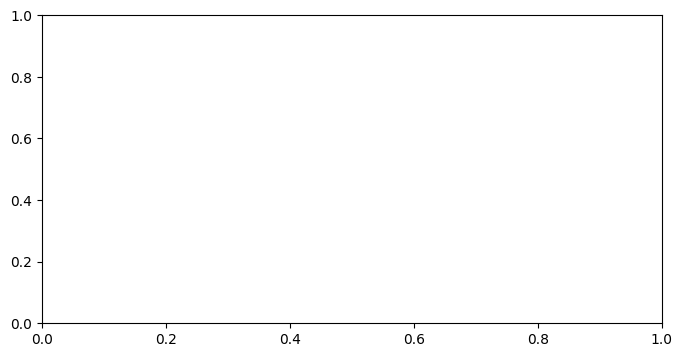

In [86]:
a = AutoSkirstymas
b = Skirstymas

langas, grafikas = plt.subplots(figsize=[8,4])
# .plot() metodas
grafikas.plot(a,b, label="Čia yra A dydis", linestyle = ':')

grafikas.set_xlabel("cia x asis")
grafikas.set_title('cia yra pavadinimas')


plt.show()

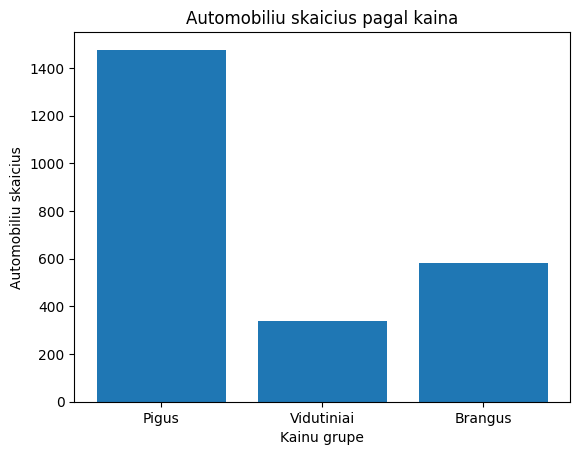

In [84]:
#tai vizualizuokite su bar 
AutoPagalKaina = ['Pigus', 'Vidutiniai', 'Brangus']
Reiksmes = Skirstymas

plt.bar(AutoPagalKaina, Reiksmes)
plt.xlabel('Kainu grupe')
plt.ylabel('Automobiliu skaicius')
plt.title('Automobiliu skaicius pagal kaina')
plt.show()

In [31]:
#NYPD failas:
#Su vizualizacija:
# Kurios valandos, kurie paros metai buvo pavojingiausi susišaudymų prasme?
#A) Kuriose valandose mirtinų susišaudymų kiekis buvo didžiausias?
#B) Kuriose valandose procentinis mirtinų susišaudymų kiekis yra didžiausias?
#Ar A ir B valandos sutampa, arne?

DfNYPD = pd.read_csv('NYPD_Shooting.csv', sep=';')
DfNYPD.head(5)





#Su life-exp.csv:
#Nuskaitykite failą
#Suraskite vidutinę, minimalią, maksimalią gyvenimo trukmę Lietuvai, 
# Latvijai, Švedijai, Vokietijai
# Padarykite, jog vartotojas galėtų įvesti, kokios šalies
# duomenis reikia išvesti
#Bonus - .plot() vizualizacija tokių duomenų:
# gyvenimo trukmė kiekvienais metais Lietuvai ir vartotojo įvestai šaliai


#Su life-exp.csv:
#atrinkite su .query() į naują lentelę tik 2019 metų duomenis.
# Toliau naudojama tik naujoji lentelė
# Suraskite vidutinę gyvenimo trukmę
# Suskirstykite valstybes į ilgaamžes ir ne
# jei gyvenimo trukmė mažiau nei vidurkis - neilgaamžė
# jei didesnė - ilgaamžė.
# Kiek buvo valstybių ilgaamžių, neilgaamžių?

#Su Dar su life-exp.csv:
#Nuskaitykite failą
#Suraskite vidutinę, minimalią, maksimalią gyvenimo trukmę Lietuvai, 
# Latvijai, Švedijai, Vokietijai
# Padarykite, jog vartotojas galėtų įvesti, kokios šalies
# duomenis reikia išvesti
#Bonus - .plot() vizualizacija tokių duomenų:
# gyvenimo trukmė kiekvienais metais Lietuvai ir vartotojo įvestai šaliai

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,201575314,08/23/2019,22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,205748546,11/27/2019,15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,193118596,02/02/2019,19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480
3,204192600,10/24/2019,00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,40.638064,-74.166108
4,201483468,08/22/2019,18:03:00,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,40.854547,-73.913339


In [ ]:
Su life-exp.csv:
life=pd.read_csv('life-exp.csv')
#atrinkite su .query() į naują lentelę tik 2019 metų duomenis.
life_new = life.query('Year == 2019')
life_new.head(5)
# Toliau naudojama tik naujoji lentelė
# Suraskite vidutinę gyvenimo trukmę
vid_gyv_trukmė = life_new['Life expectancy'].mean()
print('vidutinė gyvenimo trukmė', vid_gyv_trukmė)
# Suskirstykite valstybes į ilgaamžes ir ne
# jei gyvenimo trukmė mažiau nei vidurkis - neilgaamžė
# jei didesnė - ilgaamžė.
# Kiek buvo valstybių ilgaamžių, neilgaamžių?
#  .query() duomenų filtravimas ir atrinkimas
def gyv_trukme(amzius):
    if amzius > vid_gyv_trukmė:
        return "ilgaamžis"
    else: return "neilgaamžis"
life_new['Ilgaamžiškumas'] = life_new['Life expectancy'].apply(gyv_trukme)    
ilgaam = life_new[life_new['Life expectancy'] > vid_gyv_trukmė]['Life expectancy'].count()
neilgaam = life_new[life_new['Life expectancy'] < vid_gyv_trukmė]['Life expectancy'].count()
print('Ilgaamžių valstybių kiekis', ilgaam)
print('Neilgaamžių valstybių kiekis', neilgaam)
ilg = life_new["Ilgaamžiškumas"].value_counts()
print(ilg)

In [19]:
# duoti sąrašai:
x = [12,16,17,1,0,-1,-8,10,14]
y = ["Vilnius", 1323, 'Kaunas', 'Alytus', 'omega', -42, 42]

# su map () ir savo pasirašyta funkcija sugeneruokite naujus sąrašus, kur 
# būtų simbolių kiekiai iš sąrašų x ir y.

def simboliai(sarasas):
    simboliuSk = []
    for e in sarasas:
        simboliuSk.append(len(str(e)))
    return simboliuSk
print(simboliai(x))

def simb(e):
    return len(str(e))

x1 = list(map(simb, x))
print(x1)

y1 = list(map(simb, y))
print(y1)   


[2, 2, 2, 1, 1, 2, 2, 2, 2]
[2, 2, 2, 1, 1, 2, 2, 2, 2]
[7, 4, 6, 6, 5, 3, 2]


In [20]:
s = 'A'
lst = []
dct = {}
sets = set()
flt = 1.0
intgr = 7
tpl = (7,)
print(type(s), type(s) is str)
print(type(lst), type(lst) is list)
print(type(dct), type(dct) is dict)
print(type(sets), type(sets) is set)
print(type(flt), type(flt) is float)
print(type(intgr), type(intgr) is int)
print(type(tpl), type(tpl) is tuple)

<class 'str'> True
<class 'list'> True
<class 'dict'> True
<class 'set'> True
<class 'float'> True
<class 'int'> True
<class 'tuple'> True


In [27]:
# advanced: skaidrėse susiraskite prie if'o is operatorių ir pavyzdžius su type()
# ir sugeneruokite naują sąrašą iš z'o:
#  kur tekstas - tai suskaičiuojate simbolių kiekį, kur skaičius - padauginate iš 2.5
#  kur sąrašas - randate sąrašo skaičiųą sumą
z = ["Vilnius", 1323,[4,5,6], 'Kaunas', 'Alytus', 'omega', -42, 42, [1,2,3]]
   
def convert(elementas):
    if type(elementas) is str:
        return len(elementas)
    elif type(elementas) is int:
        return elementas * 2.5
    elif type(elementas) is list:
        return sum(elementas)

z2 = list(map(convert, z))
print(z2)

[7, 3307.5, 15, 6, 6, 5, -105.0, 105.0, 6]


In [34]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
# import mysql.connector as cnt
#import panel as pn
#pn.extension()
# import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\rezav\OneDrive\Stalinis kompiuteris\Duomenų mokslas\JupyterNotebooksR


In [46]:
miestai = pd.read_excel('miestai.xlsx')
miestai.head(50)

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius
0,Vilnius,0,1323 m.,1387 m.,16,557440
1,Kaunas,102,1361 m.,1408 m.,13,286763
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898
3,Šiauliai,213,1236 m.,1713 m.,14,100119
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148
5,Alytus,101,1377 m.,1581 m.,7,50421
6,Marijampolė,138,1667 m.,1792 m.,9A,35253
7,Mažeikiai,291,1501,1924 m.,7A,32711
8,Jonava,102,1740 m.,1924 m.,13,26715
9,Utena,96,1261 m.,1924–1926 m.,10,25496


In [51]:
# Pridėkite du naujus stulpelius: Miesto amžius bei kiek metų jis turi miesto teises.
  
def AmziausSkaiciavimas(m):
    if 'XIII' in m:
        return 2024 - 1201
    elif 'XIV' in m:
        return 2024 - 1301
    elif 'XV' in m:
        return 2024 - 1401
    elif 'XVI' in m:
        return 2024 - 1501
    elif 'XVII' in m:
        return 2024 - 1601
    elif 'XVIII' in m:
        return 2024 - 1701
    elif 'XIX' in m:
        return 2024 - 1801
    elif 'XX' in m:
        return 2024 - 1901
    elif len(m) > 4:
        return 2024 - int(m[:4])
    elif type(m) is str:
        return 2024 - int(m[:-2])
    elif type(m) is int:
        return 2024 - m
    else:
        return None
    
miestai['Amzius'] = miestai['Paminėjimo metai'].apply(AmziausSkaiciavimas)
# miestai['Miesto teisių turejimo laikas'] = miestai['Gautos miesto teisės'].apply(AmziausSkaiciavimas)
miestai.head(5)
# DfAutoTrump['Kainu grupe'] = DfAutoTrump['KainaInt'].apply(ConvertKainuGr)


TypeError: argument of type 'int' is not iterable

In [52]:
def MiestuAmzius(Miestas):
    return 2024 - float(str(Miestas)[0:4])
miestai['miestoAmzius'] = miestai['Paminėjimo metai'].apply(MiestuAmzius)
miestai.head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,miestoAmzius
0,Vilnius,0,1323 m.,1387 m.,16,557440,701.0
1,Kaunas,102,1361 m.,1408 m.,13,286763,663.0
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898,772.0
3,Šiauliai,213,1236 m.,1713 m.,14,100119,788.0
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148,521.0


In [80]:
def MiestuAmzius(Miestas):
    return 2024 - float(str(Miestas)[0:4])
miestai['miestoAmzius'] = miestai['Paminėjimo metai'].apply(MiestuAmzius)

def MeistuTeises(Miestas):
    try:
        return 2024 - float(str(Miestas)[0:4])
    except:
        return -1
    
miestai['miestoTeises'] = miestai['Gautos miesto teisės'].apply(MeistuTeises)
miestai.head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,miestoAmzius,miestoTeises
0,Vilnius,0,1323 m.,1387 m.,16,557440,701.0,637.0
1,Kaunas,102,1361 m.,1408 m.,13,286763,663.0,616.0
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898,772.0,767.0
3,Šiauliai,213,1236 m.,1713 m.,14,100119,788.0,311.0
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148,521.0,233.0


In [65]:
# Su query() atrinkite miestus, kuriuose yra daugiau nei 50 tūkst žmonių,
# raskite žmonių kiekio vidurkį.
# Atrinkite miestus, įkurtus seniau, nei 1500 m, ir raskite bendrą gyventojų skaičių 
# šiuose miestuose.

miestai50 = miestai.query("`Gyventojų skaičius` > 50000")
GyvVid = miestai50['Gyventojų skaičius'].mean()
print(GyvVid)

miestai50.head(35)

miestai1500 = miestai.query('miestoAmzius > (2024 - 1500)')
miestai1500.head(35)

GyvSk = miestai1500['Gyventojų skaičius'].sum()
print(GyvSk)


204964.83333333334
1463422


In [7]:
miestai = pd.read_excel('miestai.xlsx')
apskritys = pd.read_csv('apskritys.csv')

In [6]:
miestai.head(5)

NameError: name 'miestai' is not defined

In [5]:
apskritys.head(10)

NameError: name 'apskritys' is not defined

In [8]:
# .merge()

miestaiSuApskritimis = pd.merge(left=miestai, right=apskritys, left_on='Apskritis', right_on='Kodas', how='inner')
miestaiSuApskritimis.head(30)

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis_x,Gyventojų skaičius,index,Apskritis_y,Kodas
0,Marijampolė,138,1667 m.,1792 m.,9A,35253,6,Marijampolės,9A
1,Mažeikiai,291,1501,1924 m.,7A,32711,8,Telšių,7A
2,Tauragė,230,1499 m.,1924 m.,7B,21685,9,Tauragės,7B
3,Telšiai,285,1450 m.,1791 m.,7A,21548,8,Telšių,7A
4,Plungė,287,1567 m.,1792 m.,7A,16945,8,Telšių,7A
5,Jurbarkas,188,1258 m.,1611 m.,7B,9831,9,Tauragės,7B
6,Vilkaviškis,161,1501,1660 m.,9A,9621,6,Marijampolės,9A
7,Kazlų Rūda,136,1737 m.,1950 m.,9A,5666,6,Marijampolės,9A
8,Šakiai,164,1599 m.,XIX a. 1-oji pusė,9A,5003,6,Marijampolės,9A
9,Šilalė,245,1501,1952 m.,7B,4728,9,Tauragės,7B


In [9]:
# .groupby()

mgr = miestaiSuApskritimis.groupby(by='Apskritis_y')



In [10]:
mgr.groups.keys()

dict_keys(['Marijampolės', 'Tauragės', 'Telšių'])

In [1]:
miestai = pd.read_excel('miestai.xlsx')
miestai['Apskritis'] = miestai['Apskritis'].apply(str)
apskritys = pd.read_csv('apskritys.csv')
apskritys['Kodas'] = apskritys['Kodas'].apply(str)

NameError: name 'pd' is not defined

In [2]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
# import mysql.connector as cnt
#import panel as pn
#pn.extension()
# import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\rezav\OneDrive\Stalinis kompiuteris\Duomenų mokslas\JupyterNotebooksR


In [25]:
# .merge()

miestaiSuApskritimis =  pd.merge(left=miestai, right=apskritys,
                                 left_on='Apskritis', right_on='Kodas', how='left')
miestaiSuApskritimis.head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis_x,Gyventojų skaičius,index,Apskritis_y,Kodas
0,Vilnius,0,1323 m.,1387 m.,16,557440,0,Vilniaus,16
1,Kaunas,102,1361 m.,1408 m.,13,286763,2,Kauno,13
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898,5,Klaipėdos,9
3,Šiauliai,213,1236 m.,1713 m.,14,100119,1,Šiaulių,14
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148,3,Panevėžio,11


In [26]:
# .groupby()

mgr = miestaiSuApskritimis.groupby(by='Apskritis_y')

In [27]:
mgr.groups.keys()

dict_keys(['Alytaus', 'Kauno', 'Klaipėdos', 'Marijampolės', 'Panevėžio', 'Tauragės', 'Telšių', 'Utenos', 'Vilniaus', 'Šiaulių'])

In [22]:
miestai = pd.read_excel('miestai.xlsx')
miestai['Apskritis'] = miestai['Apskritis'].apply(str)
apskritys = pd.read_csv('apskritys.csv')
apskritys['Kodas'] = apskritys['Kodas'].apply(str)

In [29]:
# agregacijos:

mgr.mean(numeric_only=True).reset_index()


,Apskritis_y,Atstumas iki sostinės,Gyventojų skaičius,index
0,Alytaus,116.000000,11109.142857,7.0
1,Kauno,110.384615,29637.538462,2.0
2,Klaipėdos,315.777778,24508.000000,5.0
3,Marijampolės,162.666667,7549.333333,6.0
4,Panevėžio,166.636364,11621.090909,3.0
5,Tauragės,224.000000,5704.571429,9.0
6,Telšių,280.428571,11147.000000,8.0
7,Utenos,116.500000,7114.900000,4.0
8,Vilniaus,44.625000,41005.562500,0.0
9,Šiaulių,226.857143,11872.142857,1.0


In [31]:
mgr.sum(numeric_only=True).reset_index()

,Apskritis_y,Atstumas iki sostinės,Gyventojų skaičius,index
0,Alytaus,812,77764,49
1,Kauno,1435,385288,26
2,Klaipėdos,2842,220572,45
3,Marijampolės,1464,67944,54
4,Panevėžio,1833,127832,33
5,Tauragės,1568,39932,63
6,Telšių,1963,78029,56
7,Utenos,1165,71149,40
8,Vilniaus,714,656089,0
9,Šiaulių,3176,166210,14


In [34]:
mgrII = miestaiSuApskritimis[['Miestas', 'Gyventojų skaičius', 'Apskritis_y']].groupby(by='Apskritis_y')
mgrII.sum(numeric_only=True).reset_index()

,Apskritis_y,Gyventojų skaičius
0,Alytaus,77764
1,Kauno,385288
2,Klaipėdos,220572
3,Marijampolės,67944
4,Panevėžio,127832
5,Tauragės,39932
6,Telšių,78029
7,Utenos,71149
8,Vilniaus,656089
9,Šiaulių,166210


In [35]:
mgrII.count()

,Miestas,Gyventojų skaičius
Apskritis_y,,
Alytaus,7,7
Kauno,13,13
Klaipėdos,9,9
Marijampolės,9,9
Panevėžio,11,11
Tauragės,7,7
Telšių,7,7
Utenos,10,10
Vilniaus,16,16


In [36]:
mgrII.get_group('Marijampolės') # grazina data frame

,Miestas,Gyventojų skaičius,Apskritis_y
6,Marijampolė,35253,Marijampolės
31,Vilkaviškis,9621,Marijampolės
43,Kazlų Rūda,5666,Marijampolės
48,Šakiai,5003,Marijampolės
52,Kybartai,4575,Marijampolės
58,Kalvarija,3858,Marijampolės
74,Gelgaudiškis,1603,Marijampolės
76,Kudirkos Naumiestis,1480,Marijampolės
92,Virbalis,885,Marijampolės


In [46]:
dus18 = pd.read_csv('DUS2018.csv')
du18 = dus18[['lytis','issilavinimas','bdu_spalio', 'amzius']]
du18.head()

,lytis,issilavinimas,bdu_spalio,amzius
0,F,G2,460,40-49
1,M,G2,1487,50-59
2,M,G2,1500,40-49
3,M,G2,1500,50-59
4,F,G2,400,40-49


In [38]:
dugr = du18.groupby(by=['lytis','issilavinimas'])
dugr.groups.keys()

dict_keys([('F', 'G1'), ('F', 'G2'), ('F', 'G3'), ('F', 'G4'), ('M', 'G1'), ('M', 'G2'), ('M', 'G3'), ('M', 'G4')])

In [39]:
dugr.get_group(('F', 'G1'))

,lytis,issilavinimas,bdu_spalio,amzius
278,F,G1,436,60+
578,F,G1,1050,30-39
592,F,G1,440,60+
594,F,G1,596,40-49
595,F,G1,660,50-59
...,...,...,...,...
42657,F,G1,848,14-29
42761,F,G1,460,40-49
42762,F,G1,154,14-29
42765,F,G1,585,50-59


In [40]:
dugr.mean(numeric_only=True)

bdu_spalio
lytis issilavinimas             
F     G1              524.975701
      G2              627.524763
      G3              937.024554
      G4             1101.596986
M     G1              689.555297
      G2              807.371033
      G3             1269.916492
      G4             1458.712409

In [41]:
dugr.mean(numeric_only=True).unstack()

bdu_spalio                                      
issilavinimas          G1          G2           G3           G4
lytis                                                          
F              524.975701  627.524763   937.024554  1101.596986
M              689.555297  807.371033  1269.916492  1458.712409

<Axes: xlabel='lytis,issilavinimas'>

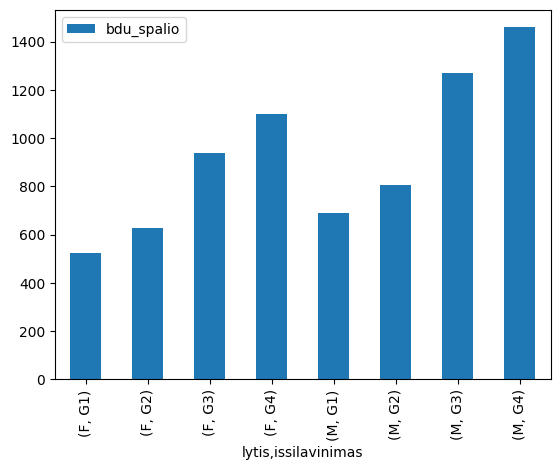

In [42]:
dugr.mean(numeric_only=True).plot(kind='bar')

<Axes: xlabel='lytis'>

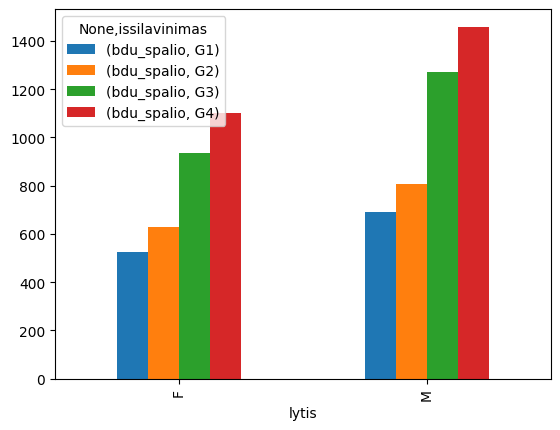

In [43]:
dugr.mean(numeric_only=True).unstack().plot(kind='bar')

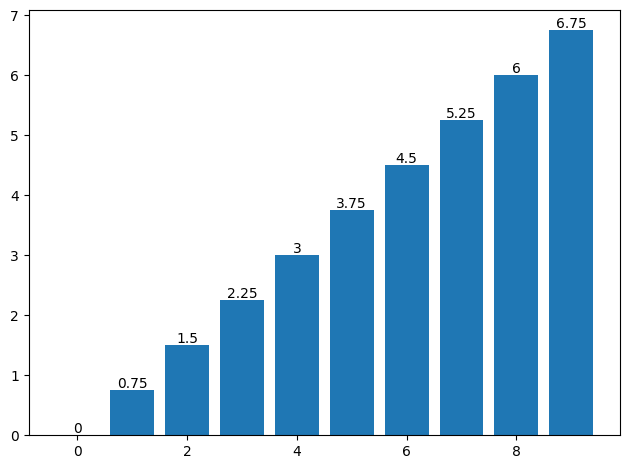

In [44]:
x=np.arange(0, 10) # ? - list with labels
fig, axis = plt.subplots()
#plotting code:
P = axis.bar(x, x*0.75)
axis.bar_label(P)

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [57]:
dus18.head(5)

,svoris,stazas,darbo_laiko_dalis,evrk,im_dydzio_kodas,im_dydis,amzius,atostogu_dienos,sutarties_rusis,virsvalandziu_bdu,...,sutartis,apmoketos_val,bdu_val,nuts,virsvalandziu_sk,premijos,bdu_spalio,priemokos,objectid,issilavinimas
0,25.57,0,100,XC,0,1_49,40-49,20,A,0,...,N,183,2.51,LT,0,146,460,0,1,G2
1,25.05,13,100,XC,0,1_49,50-59,26,A,0,...,N,183,8.13,LT,0,132,1487,0,2,G2
2,25.44,13,100,XC,0,1_49,40-49,26,A,0,...,N,183,8.20,LT,0,132,1500,0,3,G2
3,24.91,13,100,XC,0,1_49,50-59,26,A,0,...,N,183,8.20,LT,0,132,1500,0,4,G2
4,24.51,18,100,XM,1,50_249,40-49,24,A,0,...,N,183,2.19,LT,0,0,400,0,5,G2


In [56]:
# sugrupuokite dus2018 pagal išssilavinimą, suraskite vidutinį atlyginimą

du18Df = dus18[['issilavinimas', 'bdu_spalio']]
du18Issilavinimas = du18Df.groupby('issilavinimas')
VidDu = du18Issilavinimas.mean(numeric_only=True).reset_index()
print(VidDu)



  issilavinimas   bdu_spalio
0            G1   626.391679
1            G2   732.687157
2            G3  1094.764026
3            G4  1246.451196


In [70]:
#  sugrupuokite pagal amžiaus grupes, suraskite vidutinį atlyginimą

du18Df = dus18[['issilavinimas', 'amzius', 'bdu_spalio']]
du18Amzius = du18Df.groupby('amzius')
VidDu = du18Amzius.mean(numeric_only=True).reset_index()
print(VidDu)

  amzius   bdu_spalio
0  14-29   865.563301
1  30-39  1088.955721
2  40-49   980.855429
3  50-59   856.067124
4    60+   784.542386


In [73]:
# Sugrupuokite pagal amžiaus grupes IR išsilavinimą, atskirai vyrus, atskirai moteris, suraskite vidutinius atlyginimus.
dus18A = dus18[['issilavinimas', 'amzius', 'bdu_spalio', 'lytis']]
du18Df = dus18A.query('lytis == "F"')
Df = du18Df.groupby(['amzius', 'bdu_spalio'])
VD = Df.mean(numeric_only=True).reset_index()
print(VD)
# pritaikytkite ką tik rodytą informaciją ir
# vizualizuokite barais priklausomybę tarp išssilavinimo, amžiaus grupės ir vidutiniio atlyginimo

     amzius  bdu_spalio
0     14-29           3
1     14-29           7
2     14-29          12
3     14-29          13
4     14-29          15
...     ...         ...
7156    60+        3623
7157    60+        3860
7158    60+        3950
7159    60+        4070
7160    60+        4119

[7161 rows x 2 columns]


TypeError: agg function failed [how->mean,dtype->object]

In [74]:
bydus18=pd.read_csv('DUS2018.csv')
du18=dus18[['lytis', 'issilavinimas', 'bdu_spalio', 'amzius']]
du18.head(5)
issilav_gr = du18['issilavinimas'].value_counts().index
print(issilav_gr)
for issilav in issilav_gr:
    atr_issil = du18.query('issilavinimas==@issilav')
    vid_atl = atr_issil['bdu_spalio'].mean()
    print('Išsilavinimo grupė', issilav, 'vidutinis atlyginimas', vid_atl)

Index(['G2', 'G3', 'G4', 'G1'], dtype='object', name='issilavinimas')
Išsilavinimo grupė G2 vidutinis atlyginimas 732.6871572212066
Išsilavinimo grupė G3 vidutinis atlyginimas 1094.7640256572408
Išsilavinimo grupė G4 vidutinis atlyginimas 1246.4511960095226
Išsilavinimo grupė G1 vidutinis atlyginimas 626.3916786226686


In [75]:
du18.groupby(by='issilavinimas').mean(numeric_only=True)

,bdu_spalio
issilavinimas,
G1,626.391679
G2,732.687157
G3,1094.764026
G4,1246.451196


In [76]:
amz_gr = du18['amzius'].value_counts().index
for amz in amz_gr:
    atr_amz = du18.query('amzius==@amz')
    vid_atl = atr_amz['bdu_spalio'].mean()
    print('Amžiaus grupė', amz, 'vidutinis atlyginimas', vid_atl)

Amžiaus grupė 50-59 vidutinis atlyginimas 856.0671241050119
Amžiaus grupė 40-49 vidutinis atlyginimas 980.8554293599406
Amžiaus grupė 14-29 vidutinis atlyginimas 865.5633005977796
Amžiaus grupė 30-39 vidutinis atlyginimas 1088.9557207498383
Amžiaus grupė 60+ vidutinis atlyginimas 784.542386341076


<Axes: xlabel='amzius'>

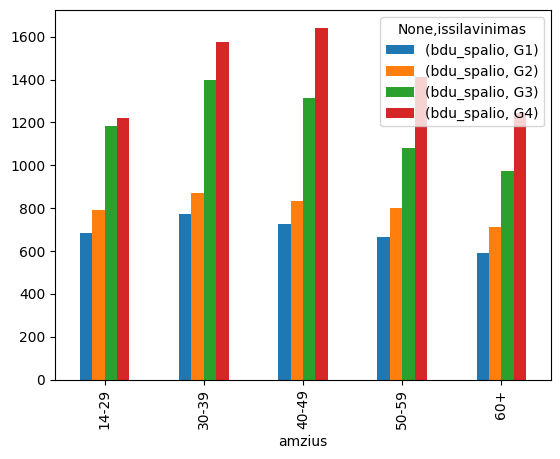

In [77]:
dugr= du18.query('lytis=="M"').groupby(by=['amzius', 'issilavinimas'])
dugr.groups.keys()
dugr.mean(numeric_only=True).unstack().plot(kind='bar')

In [79]:
miestai.sort_values(by='Atstumas iki sostinės').tail()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius
80,Salantai,311,1556 m.,1950 m.,9,1360
16,Kretinga,314,1253 m.,1609 m.,9,16840
17,Palanga,326,1253 m.,1791–1792 m.,9,15666
47,Skuodas,337,1253 m.,1572 m.,9,5289
60,Neringa,358,1385 m.,1961 m.,9,3464


In [83]:
# suraskite 5kis seniausius ir penkis naujausius miestus
miestai.sort_values(by='miestoAmzius').tail(5)

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,miestoAmzius,miestoTeises
13,Ukmergė,72,1201,1792 m.,16,20391,823.0,232.0
57,Švenčionys,84,1201,1800 m.,16,4139,823.0,224.0
56,Trakai,27,1201,XIV a. pab. – XV a. pr.,16,4238,823.0,-1.0
40,Pasvalys,182,1201,1946 m.,11,6490,823.0,78.0
78,Ramygala,146,1201,1956 m.,11,1415,823.0,68.0


In [84]:
miestai.sort_values(by='miestoAmzius').head(5)

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,miestoAmzius,miestoTeises
14,Visaginas,152,1975 m.,1977 m.,10,18185,49.0,47.0
68,Venta,268,1966 m.,1978 m.,14,2213,58.0,46.0
23,Elektrėnai,48,1960 m.,1962 m.,16,11276,64.0,62.0
38,Naujoji Akmenė,269,1952 m.,1952 m.,14,7266,72.0,72.0
85,Baltoji Vokė,35,1950 m.,1958 m.,16,1052,74.0,66.0


In [96]:
# nuskaitykite NYPD.
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
nypd.head(5)


C:\Users\rezav\AppData\Local\Temp\ipykernel_28668\2339256003.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})


,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,2019-08-23 22:10:00,201575314,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,2019-11-27 15:54:00,205748546,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,2019-02-02 19:40:00,193118596,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480
3,2019-10-24 00:52:00,204192600,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,40.638064,-74.166108
4,2019-08-22 18:03:00,201483468,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,40.854547,-73.913339


In [113]:
#Suraskite, kiek kieviename rajone (BORO) buvo susišaudymų.
nypd.groupby(by='BORO').count()['INCIDENT_KEY'].reset_index()

,BORO,INCIDENT_KEY
0,BRONX,6195
1,BROOKLYN,8913
2,MANHATTAN,2647
3,QUEENS,3225
4,STATEN ISLAND,646


In [114]:
# prisidėkite stulpelį, kuriame būtų tik įvykio laiko valandos

nypd['Valandos'] = nypd['DATA'].dt.hour
nypd.head(5)


,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude,Valandos
0,2019-08-23 22:10:00,201575314,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141,22
1,2019-11-27 15:54:00,205748546,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571,15
2,2019-02-02 19:40:00,193118596,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480,19
3,2019-10-24 00:52:00,204192600,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,40.638064,-74.166108,0
4,2019-08-22 18:03:00,201483468,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,40.854547,-73.913339,18


In [115]:
# Suraskite, kiek ir kokios rasės buvo nusikaltėlių; aukų?

nypd.groupby('PERP_RACE').count()['INCIDENT_KEY'].reset_index()

,PERP_RACE,INCIDENT_KEY
0,AMERICAN INDIAN/ALASKAN NATIVE,2
1,ASIAN / PACIFIC ISLANDER,105
2,BLACK,9336
3,BLACK HISPANIC,1007
4,UNKNOWN,1839
5,WHITE,239
6,WHITE HISPANIC,1827


In [116]:
nypd.groupby('VIC_RACE').count()['INCIDENT_KEY'].reset_index()

,VIC_RACE,INCIDENT_KEY
0,AMERICAN INDIAN/ALASKAN NATIVE,9
1,ASIAN / PACIFIC ISLANDER,286
2,BLACK,15470
3,BLACK HISPANIC,2085
4,UNKNOWN,93
5,WHITE,578
6,WHITE HISPANIC,3105


In [118]:
# BONUS ADVANCED: vizualizuokite susišaudymų skaičių kas valandą skirtinguose rajonuose.

valandos = nypd['Valandos']
rajonas = nypd.groupby(by='BORO').count()['INCIDENT_KEY'].reset_index().value
susisaudymai = nypd.groupby(by='BORO').count()['INCIDENT_KEY'].reset_index().index

langas, grafikas = plt.subplots()

grafikas.plot(valandos, rajonas, susisaudymai, label="Susisaudymu pasiskirstymas pagal menesius", linewidth = 2, marker = 'o', color = "red")

grafikas.set_xlabel("Menuo")
grafikas.set_ylabel("Susisaudymu skaicius")
grafikas.set_title('Susisaudymu skaicius')

grafikas.legend()

plt.show()




AttributeError: 'DataFrame' object has no attribute 'value'

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (21626,) and arg 1 with shape (5,).

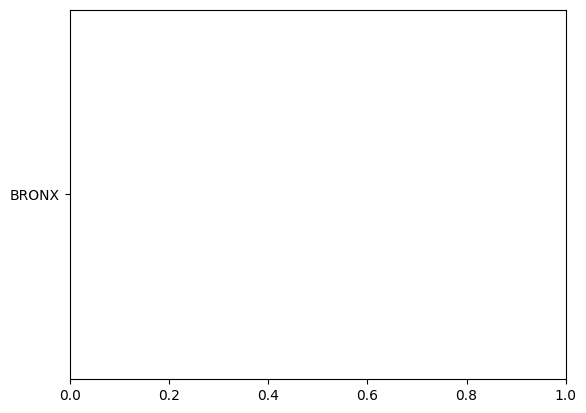

In [121]:
rajonas = nypd.groupby('BORO').size().reset_index(name='Susisaudymų skaicius')

plt.bar(nypd['Valandos'], rajonas['BORO'], rajonas['Susisaudymų skaicius'], label='Susisaudymų skaicius pagal rajonus', color='red')

plt.xlabel('Rajonas')
plt.ylabel('Susisaudymų skaicius')
plt.title('Susisaudymų skaicius pagal rajonus')

plt.show()

C:\Users\rezav\AppData\Local\Temp\ipykernel_33876\4156036623.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME'])


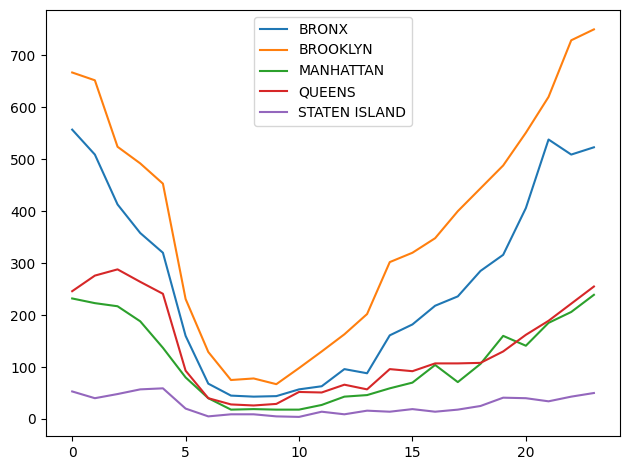

In [3]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME'])
nypd['H'] = nypd['OCCUR_TIME'].dt.hour
nypd = nypd[['BORO', 'PERP_RACE','VIC_RACE','H']]

nypdgr = nypd.groupby('BORO')

fig, axis = plt.subplots()
#plotting code:
for group in nypdgr.groups.keys():
    h = nypdgr.get_group(group)['H'].value_counts().sort_index()
    axis.plot(h.index, h.values, label=group)

axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [1]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
# import mysql.connector as cnt
#import panel as pn
#pn.extension()
# import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\rezav\OneDrive\Stalinis kompiuteris\Duomenų mokslas\JupyterNotebooksR


C:\Users\rezav\AppData\Local\Temp\ipykernel_33876\3038669385.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME'])


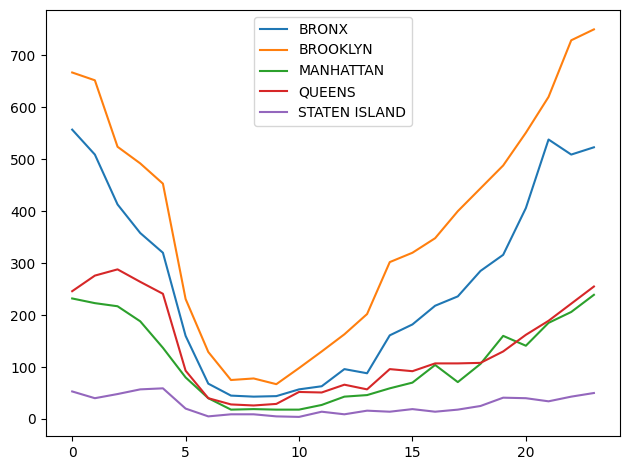

In [4]:

nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME'])
nypd['H'] = nypd['OCCUR_TIME'].dt.hour
nypd = nypd[['BORO', 'PERP_RACE','VIC_RACE','H']]

nypdgr = nypd.groupby('BORO')

fig, axis = plt.subplots()
#plotting code:
for group in nypdgr.groups.keys():
    h = nypdgr.get_group(group)['H'].value_counts().sort_index()
    axis.plot(h.index, h.values, label=group)

axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

C:\Users\rezav\AppData\Local\Temp\ipykernel_33876\2671166086.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nypd = pd.read_csv('NYPD_Shooting.csv', sep = ';', parse_dates=['OCCUR_TIME'])


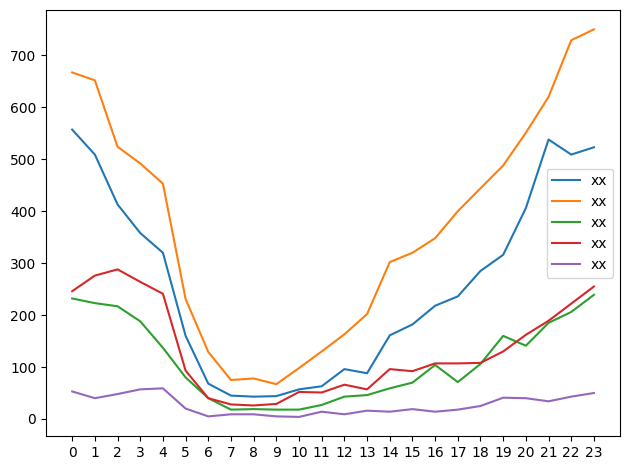

In [18]:
#  grafiko geras pavyzdys
#  rasant :sfig - gaunami automatiniai pavyzdziai

nypd = pd.read_csv('NYPD_Shooting.csv', sep = ';', parse_dates=['OCCUR_TIME'])
nypd['Valandos'] = nypd['OCCUR_TIME'].dt.hour # .dt yra datos laiko funkciju grupe
nypd = nypd[['BORO', 'Valandos']] # atsifiltruojam lentele ir pakeiciam senesne jos versija
nypdgr = nypd.groupby('BORO') # sugrupuojam pagal boro

fig, axis = plt.subplots() # cia fig reiskia langa, o axis - braizoma grafika.

for boro in nypdgr.groups.keys(): # iesko kiekvieno elemento is sugupuotu key verciu saraso, kas yra boro sarasas
    h = nypdgr.get_group(boro)['Valandos'].value_counts().sort_index()
    axis.plot(h.index, h.values, label=boro) # pirmas kintamasis yra x asis, antras - y, label gali buti konkretus uzrasas arba elementai is saraso

axis.set_xticks(h.index) # suzymi visus liniuotes elementus
axis.legend(loc='best') # grafiko legenda
fig.tight_layout() # neleidzia skirtingiems grafikams uzstoti vienam kita
plt.show()

In [19]:
nypdgr.groups.keys()

dict_keys(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'])

In [ ]:
# pusetinas pavyzdys
# BONUS ADVANCED: vizualizuokite susišaudymų skaičių kas valandą skirtinguose rajonuose.
# Rodo tik vieno ajono statistika
A = nypd_small.query('BORO == "BRONX"').value_counts().sort_index(ascending=True).reset_index()
valandos= A['HR'].values
skaicius= A['count'].values
B = nypd_small.query('BORO == "BROOKLYN"').value_counts().sort_index(ascending=True).reset_index()
valandosBrooklyn= B['HR'].values
skaiciusBrooklyn= B['count'].values
langas, grafikas = plt.subplots()
grafikas.plot(valandos, skaicius, label='Susišaudymų skaičius Bronxe', linewidth=2, color= 'red', linestyle="-")
grafikas.plot(valandosBrooklyn, skaiciusBrooklyn, label='Susišaudymų skaičius Brooklyne', linewidth=2, color= 'magenta', linestyle="dashdot")
grafikas.set_xlabel("Valandos")
grafikas.set_ylabel("Susišaudymų skaičius")
grafikas.set_title("NYPD užfiksuotų susišaudymų skaičius rajonuose")
grafikas.legend(loc=[1.05,0.5])
plt.show()

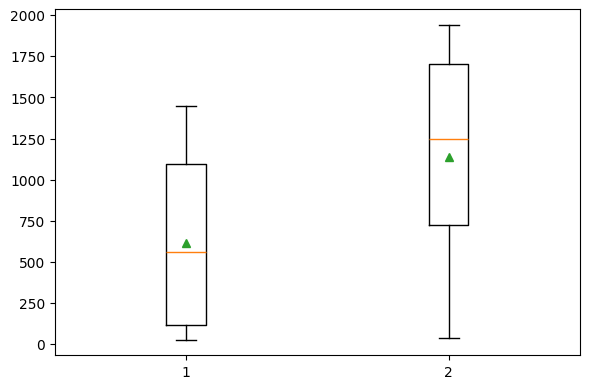

In [26]:
# boxplot

a= np.random.randint(10, 1500, 25)
b = np.random.rand(25)
c = np.random.randint(5, 2000, 25)
d = c*b

fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:
axis.boxplot(a, showmeans=True)
axis.boxplot(c,showmeans=True, positions=[2])

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

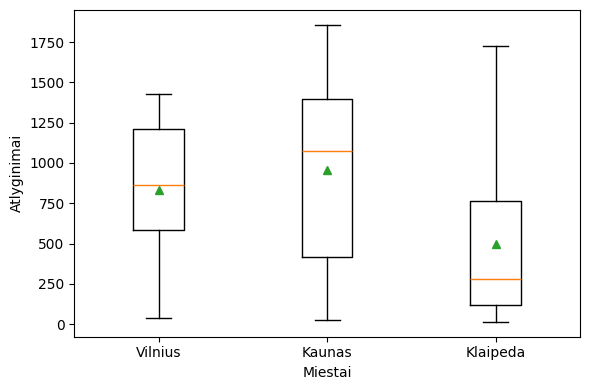

In [30]:
# boxplot

a= np.random.randint(10, 1500, 25)
b = np.random.rand(25)
c = np.random.randint(5, 2000, 25)
d = c*b

data = [a,c,d]
# :sfig

fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:
axis.boxplot(data, showmeans=True)

axis.set_ylabel('Atlyginimai')
axis.set_xlabel('Miestai')
axis.set_xticklabels(['Vilnius','Kaunas', 'Klaipeda'])
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [32]:
# Nuskaitykite life-exp.csv;
# gov-forms.csv
# ir sujunkite šias dvi lenteles į vieną naują lentelę.
le = pd.read_csv('life-exp.csv')
le.head(5)



,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1955,29.854
1,Africa,NaN,1955,38.783
2,Albania,ALB,1955,57.007
3,Algeria,DZA,1955,43.916
4,American Samoa,ASM,1955,64.985


In [33]:
gf = pd.read_csv('gov-forms.csv')
gf.head(5)

,Name,Constitutional form,Head of state,Basis of executive legitimacy
0,Afghanistan,Republic,Executive,Presidency is independent of legislature
1,Albania,Republic,Ceremonial,Ministry is subject to parliamentary confidence
2,Algeria,Republic,Executive,Presidency independent of legislature; ministr...
3,Andorra,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
4,Angola,Republic,Executive,Presidency is independent of legislature


In [71]:
leGf = pd.merge(left=le, right=gf, left_on='Entity', right_on='Name', how='inner')
leGf.head(3)

,Entity,Code,Year,Life expectancy,Name,Constitutional form,Head of state,Basis of executive legitimacy
0,Afghanistan,AFG,1955,29.854,Afghanistan,Republic,Executive,Presidency is independent of legislature
1,Albania,ALB,1955,57.007,Albania,Republic,Ceremonial,Ministry is subject to parliamentary confidence
2,Algeria,DZA,1955,43.916,Algeria,Republic,Executive,Presidency independent of legislature; ministr...


In [72]:
# Ar yra priklausomybė tarp vidutinės gyvenimo trukmės ir konstitucinės valdymo formos?

# leGf.columns - isvardina visus stulpelius
# leGf = leGf.query('Year > 2018')

leGf.query('Year > 2018')[['Constitutional form', 'Life expectancy']].groupby(by='Constitutional form').mean(numeric_only=True).reset_index()

# pilna lentele - filtruojama su query - atrenkami du stulpeliai - sugrupuojama pagal viena stulpeli
#  - skaiciuojamas visu skaitiniu stulpeliu vidurkis - nuresetinamas indeksas graziai lentelei



,Constitutional form,Life expectancy
0,Absolute monarchy,72.262000
1,Constitutionalmonarchy,77.183368
2,Provisional,64.171333
3,Republic,71.958209


In [87]:
# Suraskite 3kias valstybes, kuriose 2019 metais buvo trumpiausia gyvenimo trukmė.
# bei 3, kuriose buvo ilgiausia. hint: sort_values(by=), tail, head

leGf.query('Year == 2019').sort_values(by='Life expectancy', ascending=True).head(3)

,Entity,Code,Year,Life expectancy,Name,Constitutional form,Head of state,Basis of executive legitimacy
11679,Central African Republic,CAF,2019,53.283,Central African Republic,Republic,Executive,Presidency is independent of legislature
11680,Chad,TCD,2019,54.239,Chad,Provisional,NONE,No constitutionally-defined basis to current r...
11735,Lesotho,LSO,2019,54.331,Lesotho,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence


In [127]:
leMin = leGf.query('Year == 2019')[['Entity','Life expectancy', 'Year']].sort_values(by='Life expectancy', ascending=True).head(3)

In [124]:
leGf.query('Year == 2019')[['Entity','Life expectancy', 'Year']].sort_values(by='Life expectancy', ascending=False).head(3)


,Entity,Life expectancy,Year
11752,Monaco,86.751,2019
11787,San Marino,84.972,2019
11725,Japan,84.629,2019


In [128]:
leMax = leGf.query('Year == 2019')[['Entity','Life expectancy', 'Year']].sort_values(by='Life expectancy', ascending=False).head(3)

In [130]:
for country in leMax['Entity']:
    print (country)

Monaco
San Marino
Japan


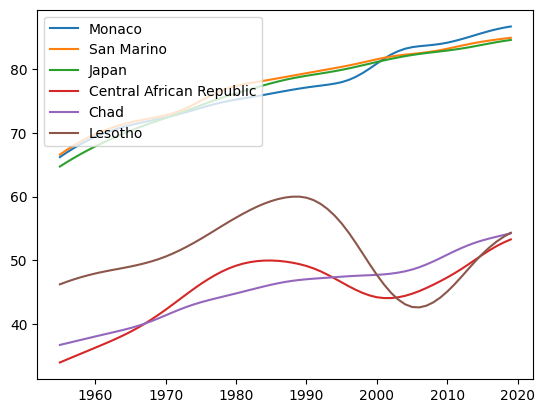

In [134]:
# ADVANCED:
# su query() ir for ciklais, .plot() komanda atavizduokite šių atrinktų valstybių
# istorinius gyvenimo trukmės duomenis

fig, axis = plt.subplots()

for country in leMax['Entity']:
    atrinktaSalis = leGf.query("Entity ==@country")[['Year','Life expectancy']].sort_values(by='Year')
    axis.plot(atrinktaSalis['Year'], atrinktaSalis['Life expectancy'], label=country) 

for country in leMin['Entity']:
    atrinktaSalis = leGf.query("Entity ==@country")[['Year','Life expectancy']].sort_values(by='Year')
    axis.plot(atrinktaSalis['Year'], atrinktaSalis['Life expectancy'], label=country)

axis.legend(loc='upper left')
plt.show()

In [95]:
CAR = leGf.query('Entity == "Central African Republic"')[['Life expectancy', 'Year']]
CAR.head(3)


,Life expectancy,Year
31,33.938,1955
213,34.406,1956
395,34.870,1957


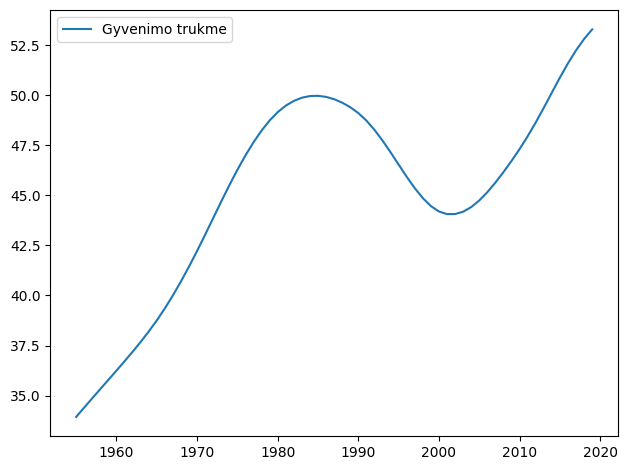

In [121]:
CAR = leGf.query('Entity == "Central African Republic"')[['Life expectancy', 'Year']].sort_values(by='Year')
fig, axis = plt.subplots()
axis.plot(CAR['Year'], CAR['Life expectancy'], label="Gyvenimo trukme") 
fig.tight_layout()
axis.legend(loc='best') 
plt.show()

In [135]:
auto = pd.read_csv('auto.csv', sep='|')
auto.head(5)

,index,id,gamintojas,modelis,pagaminimo_data,rida,variklis,kuro_tipas,varantieji_ratai,pavaros,...,service_book,warranty,catalytic_converter,multiple_key_sets,double_wheels,folding_seats,insulated_glass,two_sliding_doors,personal_ventilation,personal_illumination
0,0,ID:22996628,BMW,M5,2005-12,253 000 km,"4999 cm³, 507 AG (373kW)",Benzinas,Galiniai,Automatinė,...,0,0,0,0,0,0,0,0,0,0
1,1,ID:23120069,Mitsubishi,Outlander,2006,195 405 km,"2378 cm³, 160 AG (118kW)",Benzinas,Visi varantys (4х4),Automatinė,...,0,0,0,0,0,0,0,0,0,0
2,2,ID:23012308,Seat,Arona,2019-11,129 800 km,"1598 cm³, 95 AG (70kW)",Dyzelinas,Priekiniai,Automatinė,...,0,0,0,0,0,0,0,0,0,0
3,3,ID:23051810,Skoda,Octavia Scout,2015-06,183 000 km,"1798 cm³, 179 AG (132kW)",Benzinas,Visi varantys (4х4),Automatinė,...,0,0,0,0,0,0,0,0,0,0
4,4,ID:23117259,Volvo,XC90,2018-08,127 896 km,"1969 cm³, 235 AG (173kW)",Dyzelinas,Visi varantys (4х4),Automatinė,...,0,0,0,0,0,0,0,0,0,0


In [157]:
# Nuskaitykite auto.csv failą.
auto = pd.read_csv('auto.csv', sep='|', parse_dates=['pagaminimo_data'])[['gamintojas', 'price', 'rida','pagaminimo_data']]

# Suraskite 5-kis automobilių gamintojus, kurių gaminamų automobilių vidutinė kaina yra didžiausia.

def ConvertKaina(sk):
    skInt = int(sk.replace(' ', ''))
    return skInt

auto['Kaina'] = auto['price'].apply(ConvertKaina)

VidKaina = auto.groupby(by='gamintojas')['Kaina'].mean().sort_values(ascending=False)
VidKaina.head(5)

gamintojas
Aston Martin    125000.000000
Porsche          61999.900000
Tesla            45666.666667
Land Rover       40925.000000
Maserati         34950.000000
Name: Kaina, dtype: float64

In [155]:
# tada suraskite 5-kis gamintojus, kurių parduodamų automobilių vidutinis amžius yra didžiausias.
def ConvertAmzius(sk):
    amzius = 2024 - int(sk[:4].replace(' ', ''))
    return amzius

auto['Amzius'] = auto['pagaminimo_data'].apply(ConvertAmzius)

VidAmzius = auto.groupby(by='gamintojas')['Amzius'].mean().sort_values(ascending=False)
VidKaina.head(5)

gamintojas
Aston Martin    125000.000000
Porsche          61999.900000
Tesla            45666.666667
Land Rover       40925.000000
Maserati         34950.000000
Name: Kaina, dtype: float64

In [154]:
auto.head(5)

,gamintojas,price,rida,pagaminimo_data,Kaina,Amzius
0,BMW,19 500,253 000 km,2005-12,19500,19
1,Mitsubishi,2 700,195 405 km,2006,2700,18
2,Seat,13 490,129 800 km,2019-11,13490,5
3,Skoda,14 650,183 000 km,2015-06,14650,9
4,Volvo,38 000,127 896 km,2018-08,38000,6


In [173]:
# nuskaitykite dus2014 ir dus2018 failus. 
dus14 = pd.read_csv("dus2014.csv")[['issilavinimas', 'bdu_spalio']]
dus14['bdu_spalio'] = dus14['bdu_spalio']/3.4528
dus14.head(5)

,issilavinimas,bdu_spalio
0,G4,1.737720
1,G2,1.737720
2,G4,1.737720
3,G4,1.737720
4,G2,3.281395


In [161]:
dus18 = pd.read_csv("dus2018.csv")[['issilavinimas', 'bdu_spalio']]
dus18.head(5)

,issilavinimas,bdu_spalio
0,G2,460
1,G2,1487
2,G2,1500
3,G2,1500
4,G2,400


In [175]:
# Suraskite vidutinius atlyginimus pagal išsilavinimo pakopą tiek 2014 tiek 2018 metams.

dus14Vid = dus14.groupby('issilavinimas').mean().reset_index()
dus14Vid.head(5)

,issilavinimas,bdu_spalio
0,G1,474.744650
1,G2,543.892581
2,G3,730.410678
3,G4,1011.965397


In [176]:
dus18Vid = dus18.groupby('issilavinimas').mean().reset_index()
dus18Vid.head(5)

,issilavinimas,bdu_spalio
0,G1,626.391679
1,G2,732.687157
2,G3,1094.764026
3,G4,1246.451196


In [177]:
# Šiuos atlyginimus sudėkite į dataframe'us (reset_index()), juos sujunkite su merge į bedrą naują lentelę,
dus14Ir18Vid = pd.merge(left=dus14Vid, right=dus18Vid, left_on="issilavinimas", right_on='issilavinimas', how='inner')
dus14Ir18Vid.head(5)

,issilavinimas,bdu_spalio_x,bdu_spalio_y
0,G1,474.744650,626.391679
1,G2,543.892581,732.687157
2,G3,730.410678,1094.764026
3,G4,1011.965397,1246.451196


In [170]:
# pridėkite naują stulpelį, kur būtų apsakičiuotas pokytis tarp 2041 ir 2018 metų, procentais.
# def pokytis(sk1, sk2):
#     sk = ((sk2 - sk1)/sk1)*100
#     return sk

# dus14Ir18Vid['Skirtumas'] = dus14Ir18Vid[bdu_spalio_x, bdu_spalio_y].aplly(pokytis)

NameError: name 'bdu_spalio_x' is not defined

In [178]:
dus14Ir18Vid['Skirtumas'] = ((dus14Ir18Vid['bdu_spalio_y'] - dus14Ir18Vid['bdu_spalio_x'])/dus14Ir18Vid['bdu_spalio_x']) * 100
dus14Ir18Vid.head()

,issilavinimas,bdu_spalio_x,bdu_spalio_y,Skirtumas
0,G1,474.744650,626.391679,31.942862
1,G2,543.892581,732.687157,34.711739
2,G3,730.410678,1094.764026,49.883354
3,G4,1011.965397,1246.451196,23.171326


In [179]:
# nuskaitykite dus2014 ir dus2018 failus. 
# Suraskite vidutinius atlyginimus pagal išsilavinimo pakopą tiek 2014 tiek 2018 metams.
# Šiuos atlyginimus sudėkite į dataframe'us (reset_index()), juos sujunkite su merge į bedrą naują lentelę,
# pridėkite naują stulpelį, kur būtų apsakičiuotas pokytis tarp 2041 ir 2018 metų, procentais.
dus14 = pd.read_csv("dus2014.csv")[['issilavinimas', 'bdu_spalio']]
dus14['bdu_spalio'] = dus14['bdu_spalio']/3.4528
dus18 = pd.read_csv("dus2018.csv")[['issilavinimas', 'bdu_spalio']]
dus14Vid = dus14.groupby('issilavinimas').mean().reset_index()
dus18Vid = dus18.groupby('issilavinimas').mean().reset_index()
dus14Ir18Vid = pd.merge(left=dus14Vid, right=dus18Vid, left_on="issilavinimas", right_on='issilavinimas', how='inner')
dus14Ir18Vid['Skirtumas'] = ((dus14Ir18Vid['bdu_spalio_y'] - dus14Ir18Vid['bdu_spalio_x'])/dus14Ir18Vid['bdu_spalio_x']) * 100
dus14Ir18Vid.head()

,issilavinimas,bdu_spalio_x,bdu_spalio_y,Skirtumas
0,G1,474.744650,626.391679,31.942862
1,G2,543.892581,732.687157,34.711739
2,G3,730.410678,1094.764026,49.883354
3,G4,1011.965397,1246.451196,23.171326


In [190]:
#suraskite pokytį tarp vidutinių atlyginimų  2014 ir 2018 metams, procentais pagal amžiaus grupe
dus14 = pd.read_csv("dus2014.csv")[['amzius', 'bdu_spalio']]
dus14['bdu_spalio'] = dus14['bdu_spalio']/3.4528
dus14.head()

,amzius,bdu_spalio
0,20-29,1.737720
1,20-29,1.737720
2,40-49,1.737720
3,30-39,1.737720
4,40-49,3.281395


In [191]:
dus18 = pd.read_csv("dus2018.csv")[['amzius', 'bdu_spalio']]
dus18.head()

,amzius,bdu_spalio
0,40-49,460
1,50-59,1487
2,40-49,1500
3,50-59,1500
4,40-49,400


In [ ]:
# Šiuos atlyginimus sudėkite į dataframe'us (reset_index()), juos sujunkite su merge į bedrą naują lentelę,
# pridėkite naują stulpelį, kur būtų apsakičiuotas pokytis tarp 2041 ir 2018 metų, procentais.


In [214]:
def pavConverter(AmziausGr):
    if AmziausGr == '14-19' or AmziausGr == '20-29':
        return '14-29'
    else:
        return AmziausGr
    
dust14['amzius'] = dust14['amzius'].apply(pavConverter)


In [198]:
dus14Vid = dus14.groupby('amzius').mean().reset_index()
dus14Vid.head(8)

,amzius,bdu_spalio
0,14-19,361.947978
1,20-29,608.504803
2,30-39,795.907989
3,40-49,700.619410
4,50-59,666.763134
5,60+,626.854754


In [193]:
dus18Vid = dus18.groupby('amzius').mean().reset_index()
dus18Vid.head(5)

,amzius,bdu_spalio
0,14-29,865.563301
1,30-39,1088.955721
2,40-49,980.855429
3,50-59,856.067124
4,60+,784.542386


In [196]:
dus14Ir18Vid = pd.merge(left=dus14Vid, right=dus18Vid, left_on="amzius", right_on='amzius', how='left')
dusdus14Ir18Vid.head(5)

In [212]:
# geras pavyzdys

dust14 = pd.read_csv("dus2014.csv")[['amzius', 'bdu_spalio']]
dust18 = pd.read_csv("dus2018.csv")[['amzius', 'bdu_spalio']]
def pavConverter(AmziausGr):
    if AmziausGr == '14-19' or AmziausGr == '20-29':
        return '14-29'
    else:
        return AmziausGr
    
dust14['amzius'] = dust14['amzius'].apply(pavConverter)
dust14_small_amzius = dust14[['bdu_spalio','amzius']].groupby(by='amzius').mean(numeric_only=True).sort_values(by='bdu_spalio').sort_values(by='amzius') / 3.45
dust14_small_amzius.head(6).reset_index()
dust18_small_amzius = dust18[['bdu_spalio','amzius']].groupby(by='amzius').mean(numeric_only=True).sort_values(by='bdu_spalio').sort_values(by='amzius')
dust18_small_amzius.head(6).reset_index()
dust18_small_amzius_sujung=  pd.merge(left= dust14_small_amzius, right= dust18_small_amzius,left_on='amzius', right_on='amzius', how='inner')
dust18_small_amzius_sujung

,bdu_spalio_x,bdu_spalio_y
amzius,,
14-29,599.852683,865.563301
30-39,796.553943,1088.955721
40-49,701.188028,980.855429
50-59,667.304275,856.067124
60+,627.363506,784.542386


In [213]:
dust18_small_amzius_sujung.head().reset_index()
dust18_small_amzius_sujung['bdu_spalio_proc'] = (dust18_small_amzius_sujung['bdu_spalio_y'] - dust18_small_amzius_sujung['bdu_spalio_x']) / dust18_small_amzius_sujung['bdu_spalio_x'] *100
dust18_small_amzius_sujung.head().reset_index()

,amzius,bdu_spalio_x,bdu_spalio_y,bdu_spalio_proc
0,14-29,599.852683,865.563301,44.295979
1,30-39,796.553943,1088.955721,36.708346
2,40-49,701.188028,980.855429,39.884794
3,50-59,667.304275,856.067124,28.287373
4,60+,627.363506,784.542386,25.053877


In [217]:
# aojungiu dvi pirmas  2014m grupes i viena: 
def apjungimas(amziaus_grupe):
    if amziaus_grupe == '14-19' or amziaus_grupe == '20-29':
        return '14-29'
    else:
        return amziaus_grupe
dus2014_mini_2['amzius'] = dus2014_mini_2['amzius'].apply(apjungimas)
dus2014_mini_2 # kai ir pakeitimo puseje paminim ta pati stulpelio pavadinima, tai nauji duomenys uzsiraso ant virsaus ir nebereikia naujo stulpelio su naujais duomenim
# atlyginimu vidurkis
vidAtl2014_2= dus2014_mini_2.groupby(by='amzius')['bdu_spalio'].mean(numeric_only=True).sort_index().reset_index()
vidAtl2014_2.head(10)
#2018m vidutinis atlyginimas: 
vidAtl2018_2= dus2018_mini_2.groupby(by='amzius')['bdu_spalio'].mean(numeric_only=True).sort_index().reset_index()
vidAtl2018_2.head(10)                                                     # sumerginu dvi lenteles
du2014_ir_du2018_2 = pd.merge(left=vidAtl2014_2, right=vidAtl2018_2, left_on='amzius', right_on='amzius', how='inner')
du2014_ir_du2018_2                                                       # is litu i Eur 2014m atlyginima
du2014_ir_du2018_2['2014_atl_Eur']= du2014_ir_du2018_2['bdu_spalio_x']/3.4528
du2014_ir_du2018_2

# atlyginimu pokytis tarp 2014 ir 2018m
du2014_ir_du2018_2['Atlyginimu_pokytis_%']= 100-(du2014_ir_du2018_2['2014_atl_Eur']/du2014_ir_du2018_2['bdu_spalio_y']*100)
du2014_ir_du2018_2

NameError: name 'dus2014_mini_2' is not defined

In [219]:
dus18 = pd.read_csv("dus2018.csv")[['lytis','amzius', 'issilavinimas','bdu_spalio']]
dus18.head()

,lytis,amzius,issilavinimas,bdu_spalio
0,F,40-49,G2,460
1,M,50-59,G2,1487
2,M,40-49,G2,1500
3,M,50-59,G2,1500
4,F,40-49,G2,400


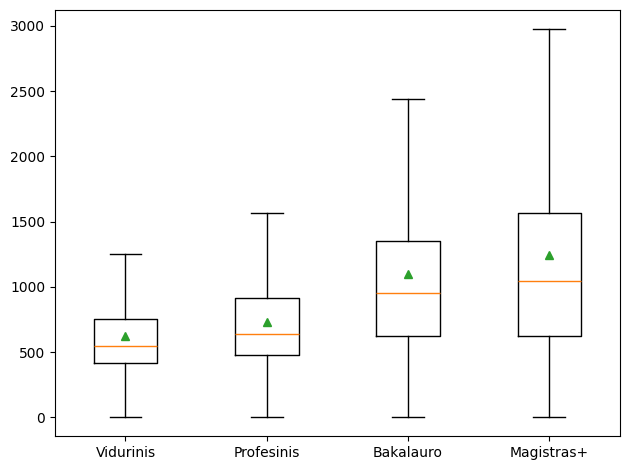

In [229]:
# boxplot()

atl_g1 = dus18.query('issilavinimas == "G1"')['bdu_spalio'].values
atl_g2 = dus18.query('issilavinimas == "G2"')['bdu_spalio'].values
atl_g3 = dus18.query('issilavinimas == "G3"')['bdu_spalio'].values
atl_g4 = dus18.query('issilavinimas == "G4"')['bdu_spalio'].values
fig, axis = plt.subplots()

atl = [atl_g1, atl_g2, atl_g3, atl_g4]
edus = ['Vidurinis', 'Profesinis', 'Bakalauro', 'Magistras+']

#plotting code:
axis.boxplot(atl, showmeans=True, showfliers=False)
axis.set_xticklabels(edus)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

<Axes: >

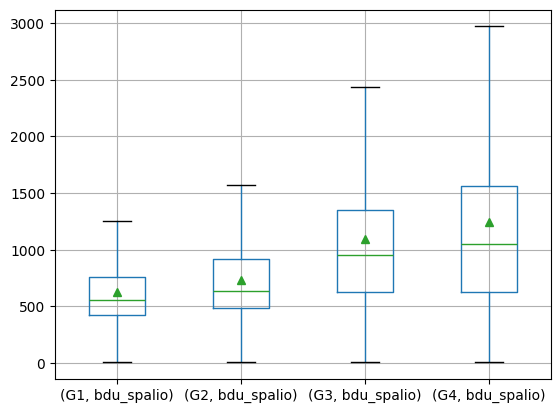

In [232]:
# II boxplot():
dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False)

[Text(1, 0, 'Vidurinis'),
 Text(2, 0, 'Profesinis'),
 Text(3, 0, 'Bakalauro'),
 Text(4, 0, 'Magistras+')]

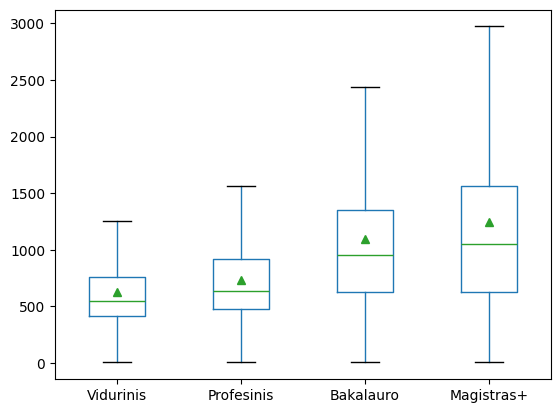

In [235]:
axis = dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False)

axis.grid(visible=False)
axis.set_xticklabels(edus)

[Text(1, 0, 'Vidurinis'),
 Text(2, 0, 'Profesinis'),
 Text(3, 0, 'Bakalauro'),
 Text(4, 0, 'Magistras+')]

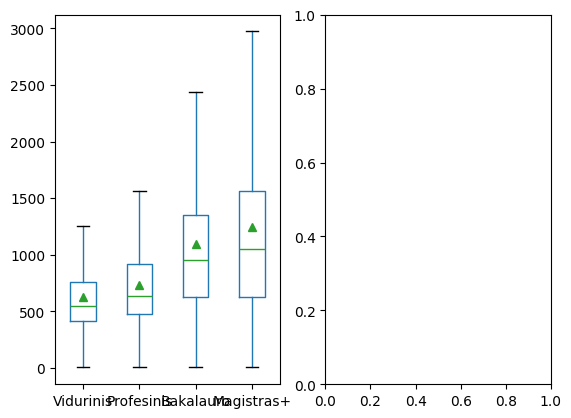

In [237]:
fig,(left,right) = plt.subplots(1,2)

dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False, ax=left)

left.grid(visible=False)
left.set_xticklabels(edus)

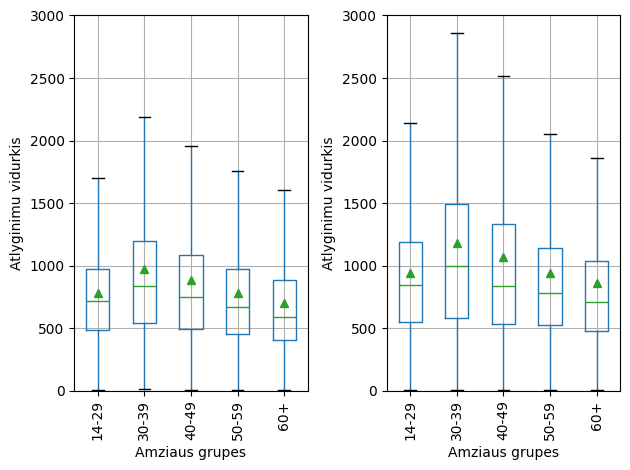

In [265]:
# geras pavyzdys
# 
# sudėkite vizualizaciją boxplotais 2018 metų atlyginimų, pagal amžiaus grupes. 
# su subplots() sukurkite 2 grafikus, kairiajame parodykite moterų statistiką, dešiniąjame - vyrų. Prisiminkite ir sudėkite ašių pavadinimus

dus18 = pd.read_csv("dus2018.csv")[['amzius', 'bdu_spalio', 'lytis']] # nuskaitymas
amziausGr = dus18['amzius'].value_counts().sort_index(ascending=True).index # automati6kai nuskaitomos grupes

fig,(left, right) = plt.subplots(1,2) = #padaromi 2 grafikai ir priskiriami left ir right
dusVidF = dus18.query('lytis =="F"').groupby('amzius').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False, ax=left) # vidurkio kodas
dusVidM = dus18.query('lytis =="M"').groupby('amzius').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False, ax=right) # vidurkio kodas

left.set_xticklabels(amziausGr, rotation=90) # kairio grafiko x asies pavadinimai ir pakreipimas
right.set_xticklabels(amziausGr, rotation=90)

left.set_ylim(0,3000) # kairio grafiko y asies skales nustatymas
right.set_ylim(0,3000)

left.set_xlabel('Amziaus grupes') # kairio grafiko x asies pavadinimas
right.set_xlabel('Amziaus grupes')

left.set_ylabel('Atlyginimu vidurkis') # kairio grafiko y asies pavadinimas
right.set_ylabel('Atlyginimu vidurkis')

#plotting code:
# axis.boxplot(atl, showmeans=True, showfliers=False)
# axis.set_xticklabels(amziausGr)
# #axis.legend(loc='best')
# #axis.ticklabel_format(style='plain')
fig.tight_layout()
# plt.show()

In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 326.8 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 731.4 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.4 MB/s eta 0:00:00


In [3]:
import seaborn as sns

In [5]:
dus18 = pd.read_csv("dus2018.csv")[['amzius', 'bdu_spalio', 'lytis']] # nuskaitymas
dus18.head()

,amzius,bdu_spalio,lytis
0,40-49,460,F
1,50-59,1487,M
2,40-49,1500,M
3,50-59,1500,M
4,40-49,400,F


In [10]:
# temos pakeitimas 

plt.style.use(style='default')
#print(plt.style.available)
#bmh, classic, default, fivethirtyeight, ggplot ...
plt.style.use(style='default')

<Axes: xlabel='amzius', ylabel='bdu_spalio'>

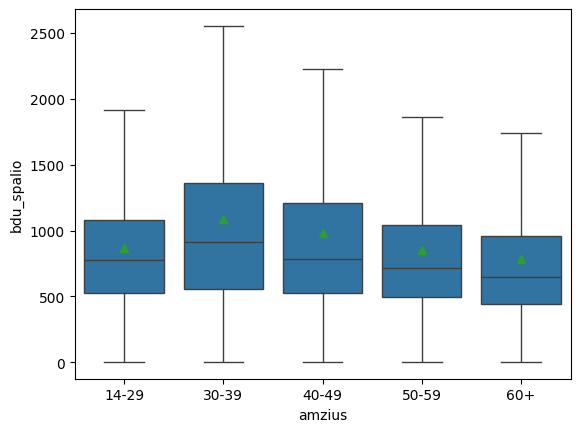

In [13]:
sns.boxplot(data=dus18.sort_values(by='amzius'), x='amzius', y='bdu_spalio', showmeans=True, showfliers=False, )

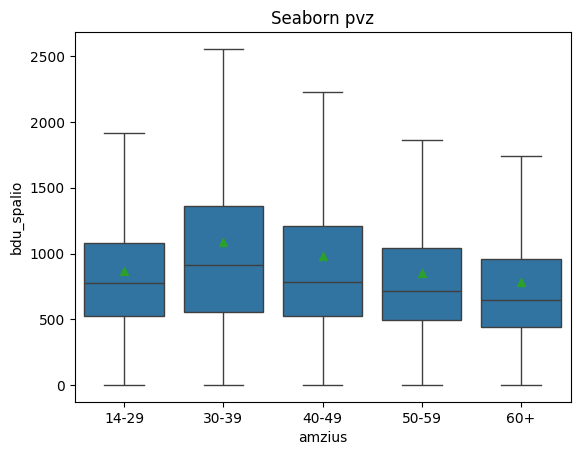

In [14]:
ax = sns.boxplot(data=dus18.sort_values(by='amzius'), x='amzius', y='bdu_spalio', showmeans=True, showfliers=False, )
ax.set_title('Seaborn pvz')
plt.show()

In [22]:


auto = pd.read_csv("auto.csv", sep="|")[['price', 'gamintojas']]
auto.head()

,price,gamintojas
0,19 500,BMW
1,2 700,Mitsubishi
2,13 490,Seat
3,14 650,Skoda
4,38 000,Volvo


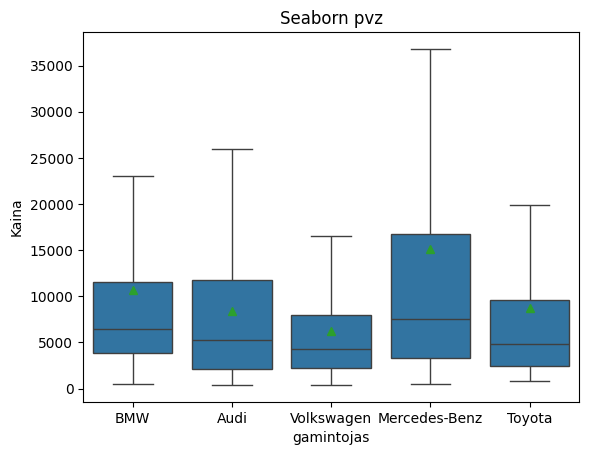

In [46]:
# auto.csv:
# nuskaitykite jį, kainą į skaičių paverskite
# Su boxplotu vizualizuokite 5kių gamintojų, daugiausiai turinčių modelių skelbimuose,
# kainų pasiskirstymus.

auto = pd.read_csv("auto.csv", sep="|")[['price', 'gamintojas']]
auto.head()
def ConvertKaina(sk):
    skInt = int(sk.replace(' ', ''))
    return skInt

auto['Kaina'] = auto['price'].apply(ConvertKaina) 
auto.head(5)

AutoMax = auto['gamintojas'].value_counts().sort_values(ascending=False).head(5).index

auto=auto.query('gamintojas in @AutoMax') # @ pries kintamaji tik tada, kai jo ieskoti reikia uz lenteles ribu

ax = sns.boxplot(data=auto, x='gamintojas', y='Kaina', showmeans=True, showfliers=False)
ax.set_title('Seaborn pvz')
plt.show()



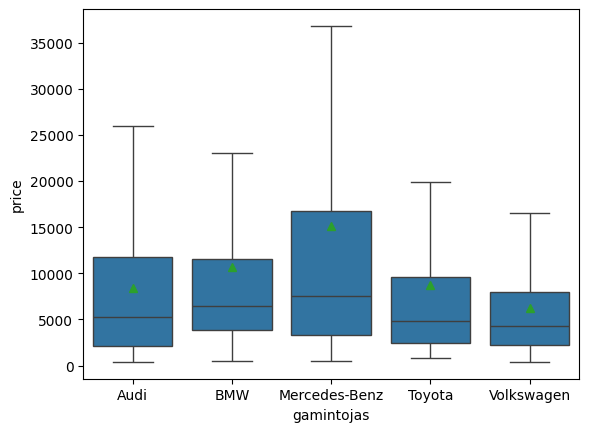

In [58]:
# geras pavyzdys

auto = pd.read_csv('auto.csv', sep='|')[['gamintojas','price','modelis','rida']]
auto['price'] = auto['price'].str.replace(' ','').apply(float)
g = list(auto['gamintojas'].value_counts().sort_values(ascending=False).index[:5])
sns.boxplot(data=auto.query('gamintojas in @g').sort_values(by='gamintojas'), x='gamintojas', y='price', showmeans=True, showfliers=False)
plt.show()

In [48]:
auto.head()

,gamintojas,price,modelis,rida
0,BMW,19500.0,M5,253 000 km
1,Mitsubishi,2700.0,Outlander,195 405 km
2,Seat,13490.0,Arona,129 800 km
3,Skoda,14650.0,Octavia Scout,183 000 km
4,Volvo,38000.0,XC90,127 896 km


In [51]:
auto['gamintojas'].str.upper()

0              BMW
1       MITSUBISHI
2             SEAT
3            SKODA
4            VOLVO
           ...    
2395         VOLVO
2396          OPEL
2397    VOLKSWAGEN
2398          AUDI
2399    VOLKSWAGEN
Name: gamintojas, Length: 2400, dtype: object

In [59]:
auto['G'] = auto['gamintojas'].str.upper().str[:3]
auto.head()

,gamintojas,price,modelis,rida,G
0,BMW,19500.0,M5,253 000 km,BMW
1,Mitsubishi,2700.0,Outlander,195 405 km,MIT
2,Seat,13490.0,Arona,129 800 km,SEA
3,Skoda,14650.0,Octavia Scout,183 000 km,SKO
4,Volvo,38000.0,XC90,127 896 km,VOL
